<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/Weight_Initialization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.8 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-f362ppwb
  Entered build tracker: /tmp/pip-build-tracker-f362ppwb
  Created temporary directory: /tmp/pip-install-e_k8ooyr
  Created temporary directory: /tmp/pip-ephem-wheel-cache-as_tinq6
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 8.3 MB/s eta 0:00:00


In [7]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [8]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [9]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-9.87, -8.43, -6.52, -4.21, -1.53, 0.54, 1.29, 2.05, 2.76, 3.47, 4.18, 4.89, 5.6, 6.31, 7.02, 7.73, 8.44, 9.15, 9.86]


In [10]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):
    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax

    particles = []

    for _ in range(nPop):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']
        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

        if(it <= 20):
          prompt = f"Generate a positive number a little lower than {w} and greater then 0.1 using Normalised Glorot Initialization. Don't write anything else, just write that number in decimal notation normally."
          w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

          USER: {prompt}

          ASSISTANT:
          '''

          w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                                repeat_penalty=1.2, top_k=150, echo=True)

          text_response = w_response['choices'][0]['text']
          value = re.findall(r'-?\d+\.\d+', text_response)
          value = [float(num) for num in value]

          if value:
              w = value[-1]
              print(f"w{it+1} = {w}")
          else:
              print("Warning: LLM failed to provide a valid weight. Retaining previous weight.")

          w_values.append(w)
          g_values.append(GlobalBest['Cost'])

        else:
          w *= wdamp

          w_values.append(w)
          g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [11]:
# def sphere(x):
#     return sum(x**2)

In [12]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [14]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [15]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [16]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [17]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [18]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [19]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [20]:
costs = []
errors = []

In [21]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [22]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

<ipython-input-13-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-10-2d427eabae00>:78: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']
Llama.generate: prefix-match hit


Iteration 1: Best Cost = 79601.60760345994
w1 = 0.23456789
Iteration 2: Best Cost = 53390.35852903981


Llama.generate: prefix-match hit


w2 = 0.225
Iteration 3: Best Cost = 36423.29679415403


Llama.generate: prefix-match hit


w3 = 0.209
Iteration 4: Best Cost = 30975.220600477624


Llama.generate: prefix-match hit


w4 = 0.185
Iteration 5: Best Cost = 23136.96876337402


Llama.generate: prefix-match hit


w5 = 0.172
Iteration 6: Best Cost = 17401.385582760675


Llama.generate: prefix-match hit


w6 = 0.159
Iteration 7: Best Cost = 11041.76730614053


Llama.generate: prefix-match hit


w7 = 0.148
Iteration 8: Best Cost = 5871.708095989454


Llama.generate: prefix-match hit


w8 = 0.135
Iteration 9: Best Cost = 5871.708095989454


Llama.generate: prefix-match hit


w9 = 0.129
Iteration 10: Best Cost = 4681.835642191606


Llama.generate: prefix-match hit


w10 = 0.124
Iteration 11: Best Cost = 4288.0285430873455


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 2344.5026928101406


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 2344.5026928101406


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = 1315.3506038558432


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = 752.5653274600895


Llama.generate: prefix-match hit


w15 = 0.093
Iteration 16: Best Cost = 730.4225537502011


Llama.generate: prefix-match hit


w16 = 0.084
Iteration 17: Best Cost = 730.4225537502011


Llama.generate: prefix-match hit


w17 = 0.096
Iteration 18: Best Cost = 730.4225537502011


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = 598.4395397223734


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = 14.802656742304407


Llama.generate: prefix-match hit


w20 = 0.065
Iteration 21: Best Cost = -8.64473339274491


Llama.generate: prefix-match hit


w21 = 0.072
Iteration 22: Best Cost = -268.50727138864784
Iteration 23: Best Cost = -365.79654387208257
Iteration 24: Best Cost = -365.79654387208257
Iteration 25: Best Cost = -365.79654387208257
Iteration 26: Best Cost = -482.4591447293345
Iteration 27: Best Cost = -482.4591447293345
Iteration 28: Best Cost = -510.41133335317807
Iteration 29: Best Cost = -534.90339826494
Iteration 30: Best Cost = -534.90339826494
Iteration 31: Best Cost = -763.2130159731277
Iteration 32: Best Cost = -763.2130159731277
Iteration 33: Best Cost = -794.108738033913
Iteration 34: Best Cost = -825.7374308778983
Iteration 35: Best Cost = -825.7374308778983
Iteration 36: Best Cost = -857.7641724597682
Iteration 37: Best Cost = -885.63044231906
Iteration 38: Best Cost = -897.9703937301471
Iteration 39: Best Cost = -901.7754530827901
Iteration 40: Best Cost = -901.7754530827901
Iteration 41: Best Cost = -901.7754530827901
Iteration 42: Best Cost = -901.7754530827901
Iteration 43: Best Cost = -901.7754530827901


Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = -701.4315146115447


Llama.generate: prefix-match hit


w2 = 0.22
Iteration 3: Best Cost = -701.4478118426521


Llama.generate: prefix-match hit


w3 = 0.19
Iteration 4: Best Cost = -701.4770091627084


Llama.generate: prefix-match hit


w4 = 0.17
Iteration 5: Best Cost = -701.494962940063


Llama.generate: prefix-match hit


w5 = 0.159
Iteration 6: Best Cost = -701.5357768487917


Llama.generate: prefix-match hit


w6 = 0.134
Iteration 7: Best Cost = -701.5373428138344


Llama.generate: prefix-match hit


w7 = 0.127
Iteration 8: Best Cost = -701.5621606418154


Llama.generate: prefix-match hit


w8 = 0.119
Iteration 9: Best Cost = -701.5800359734428


Llama.generate: prefix-match hit


w9 = 0.108
Iteration 10: Best Cost = -701.584097751261


Llama.generate: prefix-match hit


w10 = 0.095
Iteration 11: Best Cost = -701.5933520427935


Llama.generate: prefix-match hit


w11 = 0.087
Iteration 12: Best Cost = -701.6262533992735


Llama.generate: prefix-match hit


w12 = 0.093
Iteration 13: Best Cost = -701.6340803113656


Llama.generate: prefix-match hit


w13 = 0.087
Iteration 14: Best Cost = -701.6429838547555


Llama.generate: prefix-match hit


w14 = 0.092
Iteration 15: Best Cost = -701.670649355121


Llama.generate: prefix-match hit


w15 = 0.084
Iteration 16: Best Cost = -701.6753580716164


Llama.generate: prefix-match hit


w16 = 0.095
Iteration 17: Best Cost = -701.6753580716164


Llama.generate: prefix-match hit


w17 = 0.087
Iteration 18: Best Cost = -701.7094164985645


Llama.generate: prefix-match hit


w18 = 0.092
Iteration 19: Best Cost = -701.7199159529346


Llama.generate: prefix-match hit


w19 = 0.085
Iteration 20: Best Cost = -701.7345752847363


Llama.generate: prefix-match hit


w20 = 0.092
Iteration 21: Best Cost = -701.7397959340407


Llama.generate: prefix-match hit


w21 = 0.084
Iteration 22: Best Cost = -701.7562858926085
Iteration 23: Best Cost = -701.7562858926085
Iteration 24: Best Cost = -701.7562858926085
Iteration 25: Best Cost = -701.7562858926085
Iteration 26: Best Cost = -701.7569080575225
Iteration 27: Best Cost = -701.7569080575225
Iteration 28: Best Cost = -701.772402917507
Iteration 29: Best Cost = -701.779542679891
Iteration 30: Best Cost = -701.779542679891
Iteration 31: Best Cost = -701.7964487469977
Iteration 32: Best Cost = -701.7964487469977
Iteration 33: Best Cost = -701.8045709231207
Iteration 34: Best Cost = -701.8045709231207
Iteration 35: Best Cost = -701.8233093262189
Iteration 36: Best Cost = -701.831371284179
Iteration 37: Best Cost = -701.8379377179849
Iteration 38: Best Cost = -701.8421897676569
Iteration 39: Best Cost = -701.8421897676569
Iteration 40: Best Cost = -701.8421897676569
Iteration 41: Best Cost = -701.8421897676569
Iteration 42: Best Cost = -701.8483900673334
Iteration 43: Best Cost = -701.84905223576
Iter

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = 33461061463.20668


Llama.generate: prefix-match hit


w2 = 0.234
Iteration 3: Best Cost = 23735938874.089268


Llama.generate: prefix-match hit


w3 = 0.217
Iteration 4: Best Cost = 18864373135.969402


Llama.generate: prefix-match hit


w4 = 0.195
Iteration 5: Best Cost = 17055218938.585228


Llama.generate: prefix-match hit


w5 = 0.178
Iteration 6: Best Cost = 11900400088.719725


Llama.generate: prefix-match hit


w6 = 0.164
Iteration 7: Best Cost = 8355006743.296814


Llama.generate: prefix-match hit


w7 = 0.158
Iteration 8: Best Cost = 6530958572.016109


Llama.generate: prefix-match hit


w8 = 0.142
Iteration 9: Best Cost = 6248737299.139329


Llama.generate: prefix-match hit


w9 = 0.135
Iteration 10: Best Cost = 5440953662.609933


Llama.generate: prefix-match hit


w10 = 0.127
Iteration 11: Best Cost = 4234900185.9140863


Llama.generate: prefix-match hit


w11 = 0.119
Iteration 12: Best Cost = 3540015682.401106


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 3142820530.315715


Llama.generate: prefix-match hit


w13 = 0.104
Iteration 14: Best Cost = 3108697833.8180585


Llama.generate: prefix-match hit


w14 = 0.097
Iteration 15: Best Cost = 2833134272.459611


Llama.generate: prefix-match hit


w15 = 0.085
Iteration 16: Best Cost = 2461249939.332701


Llama.generate: prefix-match hit


w16 = 0.079
Iteration 17: Best Cost = 2267636812.0752263


Llama.generate: prefix-match hit


w17 = 0.064
Iteration 18: Best Cost = 1808635582.5888703


Llama.generate: prefix-match hit


w18 = 0.057
Iteration 19: Best Cost = 1651712939.5199032


Llama.generate: prefix-match hit


w19 = 0.043
Iteration 20: Best Cost = 1634762532.6030765


Llama.generate: prefix-match hit


w20 = 0.039
Iteration 21: Best Cost = 1271853233.2791436


Llama.generate: prefix-match hit


w21 = 0.028
Iteration 22: Best Cost = 1271853233.2791436
Iteration 23: Best Cost = 1066328444.8378451
Iteration 24: Best Cost = 822941350.6126583
Iteration 25: Best Cost = 822941350.6126583
Iteration 26: Best Cost = 822941350.6126583
Iteration 27: Best Cost = 783803437.3710395
Iteration 28: Best Cost = 562767555.7270298
Iteration 29: Best Cost = 534404135.5636053
Iteration 30: Best Cost = 499002091.2764607
Iteration 31: Best Cost = 499002091.2764607
Iteration 32: Best Cost = 461854638.19350964
Iteration 33: Best Cost = 420202648.0961623
Iteration 34: Best Cost = 416144468.2057496
Iteration 35: Best Cost = 318907555.7986087
Iteration 36: Best Cost = 311115265.8303562
Iteration 37: Best Cost = 294254599.01894814
Iteration 38: Best Cost = 294254599.01894814
Iteration 39: Best Cost = 275871980.3734215
Iteration 40: Best Cost = 264807331.20731786
Iteration 41: Best Cost = 224207329.5877877
Iteration 42: Best Cost = 193173025.01061815
Iteration 43: Best Cost = 193173025.01061815
Iteration 44

Llama.generate: prefix-match hit


w1 = 0.275348693216129
Iteration 2: Best Cost = 330187.46466194274


Llama.generate: prefix-match hit


w2 = 0.263792675248258
Iteration 3: Best Cost = 247362.63676311375


Llama.generate: prefix-match hit


w3 = 0.248258
Iteration 4: Best Cost = 221621.20026471678


Llama.generate: prefix-match hit


w4 = 0.239677
Iteration 5: Best Cost = 167611.19618159428


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


w6 = 0.193675
Iteration 7: Best Cost = 73939.81795029693


Llama.generate: prefix-match hit


w7 = 0.184239
Iteration 8: Best Cost = 60866.17041962469


Llama.generate: prefix-match hit


w8 = 0.175678
Iteration 9: Best Cost = 54021.241801986806


Llama.generate: prefix-match hit


w9 = 0.14329
Iteration 10: Best Cost = 45558.87542126111


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 34456.00023096801


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 26787.068565698602


Llama.generate: prefix-match hit


w12 = 0.109
Iteration 13: Best Cost = 24131.338530882313


Llama.generate: prefix-match hit


w13 = 0.085
Iteration 14: Best Cost = 20938.498813352206


Llama.generate: prefix-match hit


w14 = 0.079
Iteration 15: Best Cost = 16389.405157533016


Llama.generate: prefix-match hit


w15 = 0.068
Iteration 16: Best Cost = 13902.19275340626


Llama.generate: prefix-match hit


w16 = 0.074
Iteration 17: Best Cost = 11379.078579636302


Llama.generate: prefix-match hit


w17 = 0.065
Iteration 18: Best Cost = 11379.078579636302


Llama.generate: prefix-match hit


w18 = 0.043
Iteration 19: Best Cost = 11256.908851189028


Llama.generate: prefix-match hit


w19 = 0.075
Iteration 20: Best Cost = 9843.806464481288


Llama.generate: prefix-match hit


w20 = 0.0625
Iteration 21: Best Cost = 7369.510763245357


Llama.generate: prefix-match hit


w21 = 0.08375
Iteration 22: Best Cost = 7369.510763245357
Iteration 23: Best Cost = 7369.510763245357
Iteration 24: Best Cost = 6023.388559065059
Iteration 25: Best Cost = 4991.273363215609
Iteration 26: Best Cost = 4584.165932762375
Iteration 27: Best Cost = 3720.3691138744102
Iteration 28: Best Cost = 3134.884857759975
Iteration 29: Best Cost = 3134.884857759975
Iteration 30: Best Cost = 3134.884857759975
Iteration 31: Best Cost = 3134.884857759975
Iteration 32: Best Cost = 2548.4080558285746
Iteration 33: Best Cost = 2548.4080558285746
Iteration 34: Best Cost = 2450.9227602525516
Iteration 35: Best Cost = 2055.2722628646416
Iteration 36: Best Cost = 1979.0318198590426
Iteration 37: Best Cost = 1979.0318198590426
Iteration 38: Best Cost = 1979.0318198590426
Iteration 39: Best Cost = 1931.3702544858502
Iteration 40: Best Cost = 1931.3702544858502
Iteration 41: Best Cost = 1907.0833790121737
Iteration 42: Best Cost = 1527.1103242082463
Iteration 43: Best Cost = 1527.1103242082463
Itera

Llama.generate: prefix-match hit


w1 = 0.374826159424242
Iteration 2: Best Cost = -334.1877234203981


Llama.generate: prefix-match hit


w2 = 0.294826159424242
Iteration 3: Best Cost = -334.22839170068625


Llama.generate: prefix-match hit


w3 = 0.2375
Iteration 4: Best Cost = -334.28574377229904


Llama.generate: prefix-match hit


w4 = 0.228
Iteration 5: Best Cost = -334.3206753261272


Llama.generate: prefix-match hit


w5 = 0.205
Iteration 6: Best Cost = -334.3802078565562


Llama.generate: prefix-match hit


w6 = 0.187
Iteration 7: Best Cost = -334.4670800506519


Llama.generate: prefix-match hit


w7 = 0.169
Iteration 8: Best Cost = -334.5159174927675


Llama.generate: prefix-match hit


w8 = 0.157
Iteration 9: Best Cost = -334.56638763650795


Llama.generate: prefix-match hit


w9 = 0.143
Iteration 10: Best Cost = -334.5727848845325


Llama.generate: prefix-match hit


w10 = 0.127
Iteration 11: Best Cost = -334.59368365132434


Llama.generate: prefix-match hit


w11 = 0.119
Iteration 12: Best Cost = -334.6034798466077


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = -334.64317228651464


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = -334.6448906941378


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = -334.68373716625683


Llama.generate: prefix-match hit


w15 = 0.092
Iteration 16: Best Cost = -334.7042307688591


Llama.generate: prefix-match hit


w16 = 0.085
Iteration 17: Best Cost = -334.7042307688591


Llama.generate: prefix-match hit


w17 = 0.074
Iteration 18: Best Cost = -334.7326449283944


Llama.generate: prefix-match hit


w18 = 0.068
Iteration 19: Best Cost = -334.7368313342625


Llama.generate: prefix-match hit


w19 = 0.073
Iteration 20: Best Cost = -334.78163728901455


Llama.generate: prefix-match hit


w20 = 0.069
Iteration 21: Best Cost = -334.78655502142743


Llama.generate: prefix-match hit


w21 = 0.058
Iteration 22: Best Cost = -334.80258538245056
Iteration 23: Best Cost = -334.8088965678198
Iteration 24: Best Cost = -334.817097299401
Iteration 25: Best Cost = -334.8370573492071
Iteration 26: Best Cost = -334.8370573492071
Iteration 27: Best Cost = -334.8370573492071
Iteration 28: Best Cost = -334.86113173660993
Iteration 29: Best Cost = -334.86113173660993
Iteration 30: Best Cost = -334.86113173660993
Iteration 31: Best Cost = -334.88764844389283
Iteration 32: Best Cost = -334.8963218396296
Iteration 33: Best Cost = -334.9032309572242
Iteration 34: Best Cost = -334.9032309572242
Iteration 35: Best Cost = -334.92760862136555
Iteration 36: Best Cost = -334.92760862136555
Iteration 37: Best Cost = -334.92760862136555
Iteration 38: Best Cost = -334.92760862136555
Iteration 39: Best Cost = -334.9308511040723
Iteration 40: Best Cost = -334.9496558310949
Iteration 41: Best Cost = -334.96812987227975
Iteration 42: Best Cost = -334.96812987227975
Iteration 43: Best Cost = -334.97

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = -183.56368516280494


Llama.generate: prefix-match hit


w2 = 0.296272357142857
Iteration 3: Best Cost = -183.6190242148281


Llama.generate: prefix-match hit


w3 = 0.274278396272357
Iteration 4: Best Cost = -183.6431110486173


Llama.generate: prefix-match hit


w4 = 0.267179149509823
Iteration 5: Best Cost = -183.69219631998163


Llama.generate: prefix-match hit


w5 = 0.243179149509823
Iteration 6: Best Cost = -183.73844863196265


Llama.generate: prefix-match hit


w6 = 0.216273192146914
Iteration 7: Best Cost = -183.7778855216846


Llama.generate: prefix-match hit


w7 = 0.185736567658942
Iteration 8: Best Cost = -183.81077055696318


Llama.generate: prefix-match hit


w8 = 0.17399472901872
Iteration 9: Best Cost = -183.82994080709153


Llama.generate: prefix-match hit


w9 = 0.16595127939348
Iteration 10: Best Cost = -183.87809307168706


Llama.generate: prefix-match hit


w10 = 0.15857894736852
Iteration 11: Best Cost = -183.89899793734313


Llama.generate: prefix-match hit


w11 = 0.145123456789012
Iteration 12: Best Cost = -183.92792510954246


Llama.generate: prefix-match hit


w12 = 0.138123456789012
Iteration 13: Best Cost = -183.94110320208213


Llama.generate: prefix-match hit


w13 = 0.127890123456789
Iteration 14: Best Cost = -183.95129863022967


Llama.generate: prefix-match hit


w14 = 0.11923456789
Iteration 15: Best Cost = -183.97206445950872


Llama.generate: prefix-match hit


w15 = 0.11757894736
Iteration 16: Best Cost = -183.9929407658029


Llama.generate: prefix-match hit


w16 = 0.11257894736
Iteration 17: Best Cost = -184.03167406147426


Llama.generate: prefix-match hit


w17 = 0.10782553718
Iteration 18: Best Cost = -184.0728915049647


Llama.generate: prefix-match hit


w18 = 0.09465176445
Iteration 19: Best Cost = -184.0728915049647


Llama.generate: prefix-match hit


w19 = 0.08230372729
Iteration 20: Best Cost = -184.10519014505175


Llama.generate: prefix-match hit


w20 = 0.05469519463
Iteration 21: Best Cost = -184.10519014505175


Llama.generate: prefix-match hit


w21 = 0.08273215225
Iteration 22: Best Cost = -184.12305332794404
Iteration 23: Best Cost = -184.12631913892633
Iteration 24: Best Cost = -184.15551791039252
Iteration 25: Best Cost = -184.17725121853667
Iteration 26: Best Cost = -184.17725121853667
Iteration 27: Best Cost = -184.17725121853667
Iteration 28: Best Cost = -184.1891083646671
Iteration 29: Best Cost = -184.1891083646671
Iteration 30: Best Cost = -184.23454745791673
Iteration 31: Best Cost = -184.24349777185253
Iteration 32: Best Cost = -184.24349777185253
Iteration 33: Best Cost = -184.25145700903667
Iteration 34: Best Cost = -184.25145700903667
Iteration 35: Best Cost = -184.25145700903667
Iteration 36: Best Cost = -184.25745056658417
Iteration 37: Best Cost = -184.28862518487932
Iteration 38: Best Cost = -184.32506813766605
Iteration 39: Best Cost = -184.32506813766605
Iteration 40: Best Cost = -184.32506813766605
Iteration 41: Best Cost = -184.32506813766605
Iteration 42: Best Cost = -184.33414226292916
Iteration 43: Be

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = 45084.611682256975


Llama.generate: prefix-match hit


w2 = 0.2894741
Iteration 3: Best Cost = 32370.13853765138


Llama.generate: prefix-match hit


w3 = 0.2653291
Iteration 4: Best Cost = 28888.0590278798


Llama.generate: prefix-match hit


w4 = 0.2478571
Iteration 5: Best Cost = 28888.0590278798


Llama.generate: prefix-match hit


w5 = 0.2396759
Iteration 6: Best Cost = 28888.0590278798


Llama.generate: prefix-match hit


w6 = 0.2346819
Iteration 7: Best Cost = 25166.751578803174


Llama.generate: prefix-match hit


w7 = 0.227525
Iteration 8: Best Cost = 21681.270586529386


Llama.generate: prefix-match hit


w8 = 0.218364
Iteration 9: Best Cost = 16016.253894480371


Llama.generate: prefix-match hit


w9 = 0.195768
Iteration 10: Best Cost = 16016.253894480371


Llama.generate: prefix-match hit


w10 = 0.173245
Iteration 11: Best Cost = 12299.977021533843


Llama.generate: prefix-match hit


w11 = 0.1689
Iteration 12: Best Cost = 12299.977021533843


Llama.generate: prefix-match hit


w12 = 0.1542
Iteration 13: Best Cost = 11725.170163057053


Llama.generate: prefix-match hit


w13 = 0.1376
Iteration 14: Best Cost = 11314.01894942007


Llama.generate: prefix-match hit


w14 = 0.1295
Iteration 15: Best Cost = 11170.462608893276


Llama.generate: prefix-match hit


w15 = 0.1176
Iteration 16: Best Cost = 8464.228442804993


Llama.generate: prefix-match hit


w16 = 0.1084
Iteration 17: Best Cost = 8464.228442804993


Llama.generate: prefix-match hit


w17 = 0.0952
Iteration 18: Best Cost = 8464.228442804993


Llama.generate: prefix-match hit


w18 = 0.0876
Iteration 19: Best Cost = 8464.228442804993


Llama.generate: prefix-match hit


w19 = 0.0934
Iteration 20: Best Cost = 8464.228442804993


Llama.generate: prefix-match hit


w20 = 0.0876
Iteration 21: Best Cost = 8464.228442804993


Llama.generate: prefix-match hit


w21 = 0.0953
Iteration 22: Best Cost = 8464.228442804993
Iteration 23: Best Cost = 7184.131930224674
Iteration 24: Best Cost = 7184.131930224674
Iteration 25: Best Cost = 7184.131930224674
Iteration 26: Best Cost = 7184.131930224674
Iteration 27: Best Cost = 7184.131930224674
Iteration 28: Best Cost = 7184.131930224674
Iteration 29: Best Cost = 7184.131930224674
Iteration 30: Best Cost = 6559.0909039845765
Iteration 31: Best Cost = 5710.886456967547
Iteration 32: Best Cost = 5495.414194780822
Iteration 33: Best Cost = 4816.472874660737
Iteration 34: Best Cost = 3148.000316113017
Iteration 35: Best Cost = 3148.000316113017
Iteration 36: Best Cost = 3131.9740382322207
Iteration 37: Best Cost = 3131.9740382322207
Iteration 38: Best Cost = 3112.760793433539
Iteration 39: Best Cost = 2951.0753064555665
Iteration 40: Best Cost = 1925.234816461949
Iteration 41: Best Cost = 1925.234816461949
Iteration 42: Best Cost = 1717.6850973083258
Iteration 43: Best Cost = 1558.7642151906537
Iteration 44:

Llama.generate: prefix-match hit


w1 = 0.275394
Iteration 2: Best Cost = 44864.74651959964


Llama.generate: prefix-match hit


w2 = 0.268391
Iteration 3: Best Cost = 38917.8429965468


Llama.generate: prefix-match hit


w3 = 0.257124
Iteration 4: Best Cost = 28979.21759135052


Llama.generate: prefix-match hit


w4 = 0.239876
Iteration 5: Best Cost = 28979.21759135052


Llama.generate: prefix-match hit


w5 = 0.224567
Iteration 6: Best Cost = 21793.58697916271


Llama.generate: prefix-match hit


w6 = 0.218937
Iteration 7: Best Cost = 21478.904622843093


Llama.generate: prefix-match hit


w7 = 0.195469
Iteration 8: Best Cost = 17766.500664241725


Llama.generate: prefix-match hit


w8 = 0.183279
Iteration 9: Best Cost = 17766.500664241725


Llama.generate: prefix-match hit


w9 = 0.165432
Iteration 10: Best Cost = 17766.500664241725


Llama.generate: prefix-match hit


w10 = 0.157829
Iteration 11: Best Cost = 15456.447648994741


Llama.generate: prefix-match hit


w11 = 0.134567
Iteration 12: Best Cost = 15456.447648994741


Llama.generate: prefix-match hit


w12 = 0.129843
Iteration 13: Best Cost = 15456.447648994741


Llama.generate: prefix-match hit


w13 = 0.117652
Iteration 14: Best Cost = 15456.447648994741


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


w15 = 0.097652
Iteration 16: Best Cost = 12976.258016314836


Llama.generate: prefix-match hit


w16 = 0.084375
Iteration 17: Best Cost = 12049.875952589531


Llama.generate: prefix-match hit


w17 = 0.096292
Iteration 18: Best Cost = 12049.875952589531


Llama.generate: prefix-match hit


w18 = 0.085734
Iteration 19: Best Cost = 11204.798018690344


Llama.generate: prefix-match hit


w19 = 0.092632
Iteration 20: Best Cost = 11066.811495080807


Llama.generate: prefix-match hit


w20 = 0.08457
Iteration 21: Best Cost = 9502.418848267791


Llama.generate: prefix-match hit


w21 = 0.0923
Iteration 22: Best Cost = 9038.77916321167
Iteration 23: Best Cost = 9038.77916321167
Iteration 24: Best Cost = 7819.6340397042395
Iteration 25: Best Cost = 7819.6340397042395
Iteration 26: Best Cost = 7819.6340397042395
Iteration 27: Best Cost = 7819.6340397042395
Iteration 28: Best Cost = 4720.863351380257
Iteration 29: Best Cost = 4678.916107580197
Iteration 30: Best Cost = 3956.2769841547206
Iteration 31: Best Cost = 3956.2769841547206
Iteration 32: Best Cost = 3956.2769841547206
Iteration 33: Best Cost = 3956.2769841547206
Iteration 34: Best Cost = 3231.9360897644256
Iteration 35: Best Cost = 3216.4520215974226
Iteration 36: Best Cost = 2304.730996783339
Iteration 37: Best Cost = 1523.3911012993678
Iteration 38: Best Cost = 1107.0682318112026
Iteration 39: Best Cost = 1107.0682318112026
Iteration 40: Best Cost = 1107.0682318112026
Iteration 41: Best Cost = 799.3718184943218
Iteration 42: Best Cost = 799.3718184943218
Iteration 43: Best Cost = 361.58262922204085
Iterat

Llama.generate: prefix-match hit


w1 = 0.23456789
Iteration 2: Best Cost = 196200.75728632187


Llama.generate: prefix-match hit


w2 = 0.22456789
Iteration 3: Best Cost = 137286.34561785928


Llama.generate: prefix-match hit


w3 = 0.21345678
Iteration 4: Best Cost = 137286.34561785928


Llama.generate: prefix-match hit


w4 = 0.19542768
Iteration 5: Best Cost = 137286.34561785928


Llama.generate: prefix-match hit


w5 = 0.17357143
Iteration 6: Best Cost = 137286.34561785928


Llama.generate: prefix-match hit


w6 = 0.16892464
Iteration 7: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w7 = 0.15732386
Iteration 8: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w8 = 0.1496075
Iteration 9: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w9 = 0.1382549
Iteration 10: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w10 = 0.1276228
Iteration 11: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w11 = 0.1193456
Iteration 12: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w12 = 0.1187212
Iteration 13: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w13 = 0.1094365
Iteration 14: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w14 = 0.1087273
Iteration 15: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w15 = 0.1069548
Iteration 16: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w16 = 0.1032789
Iteration 17: Best Cost = 47712.268395915795


Llama.generate: prefix-match hit


w17 = 0.0956474
Iteration 18: Best Cost = 23424.85028066396


Llama.generate: prefix-match hit


w18 = 0.0873243
Iteration 19: Best Cost = 23424.85028066396


Llama.generate: prefix-match hit


w19 = 0.0695741
Iteration 20: Best Cost = 23424.85028066396


Llama.generate: prefix-match hit


w20 = 0.083271
Iteration 21: Best Cost = 23424.85028066396


Llama.generate: prefix-match hit


w21 = 0.095462
Iteration 22: Best Cost = 23424.85028066396
Iteration 23: Best Cost = 23424.85028066396
Iteration 24: Best Cost = 23424.85028066396
Iteration 25: Best Cost = 23424.85028066396
Iteration 26: Best Cost = 23424.85028066396
Iteration 27: Best Cost = 23424.85028066396
Iteration 28: Best Cost = 23424.85028066396
Iteration 29: Best Cost = 23424.85028066396
Iteration 30: Best Cost = 23424.85028066396
Iteration 31: Best Cost = 23424.85028066396
Iteration 32: Best Cost = 23424.85028066396
Iteration 33: Best Cost = 23424.85028066396
Iteration 34: Best Cost = 23424.85028066396
Iteration 35: Best Cost = 17225.33246758431
Iteration 36: Best Cost = 17225.33246758431
Iteration 37: Best Cost = 17225.33246758431
Iteration 38: Best Cost = 17225.33246758431
Iteration 39: Best Cost = 17225.33246758431
Iteration 40: Best Cost = 17225.33246758431
Iteration 41: Best Cost = 17225.33246758431
Iteration 42: Best Cost = 12090.212401151513
Iteration 43: Best Cost = 12090.212401151513
Iteration 44: B

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = 42449.61966827112


Llama.generate: prefix-match hit


w2 = 0.296543580835536
Iteration 3: Best Cost = 33498.14783747379


Llama.generate: prefix-match hit


w3 = 0.276543280835536
Iteration 4: Best Cost = 18012.216548747638


Llama.generate: prefix-match hit


w4 = 0.269578947368549
Iteration 5: Best Cost = 18012.216548747638


Llama.generate: prefix-match hit


w5 = 0.245476543211164
Iteration 6: Best Cost = 18012.216548747638


Llama.generate: prefix-match hit


w6 = 0.218927037037037
Iteration 7: Best Cost = 18012.216548747638


Llama.generate: prefix-match hit


w7 = 0.1645266089526609
Iteration 8: Best Cost = 15578.648133327577


Llama.generate: prefix-match hit


w8 = 0.1573204285714286
Iteration 9: Best Cost = 14332.936303790262


Llama.generate: prefix-match hit


w9 = 0.1459285714285714
Iteration 10: Best Cost = 14332.936303790262


Llama.generate: prefix-match hit


w10 = 0.1364270498557143
Iteration 11: Best Cost = 14332.936303790262


Llama.generate: prefix-match hit


w11 = 0.1284271698557143
Iteration 12: Best Cost = 13975.640644565321


Llama.generate: prefix-match hit


w12 = 0.1198270205126952
Iteration 13: Best Cost = 13975.640644565321


Llama.generate: prefix-match hit


w13 = 0.113456789
Iteration 14: Best Cost = 13700.904597054847


Llama.generate: prefix-match hit


w14 = 0.1023456789
Iteration 15: Best Cost = 10811.929480030229


Llama.generate: prefix-match hit


w15 = 0.0984765432
Iteration 16: Best Cost = 10811.929480030229


Llama.generate: prefix-match hit


w16 = 0.0892755379
Iteration 17: Best Cost = 9661.416042640887


Llama.generate: prefix-match hit


w17 = 0.0645626174
Iteration 18: Best Cost = 9661.416042640887


Llama.generate: prefix-match hit


w18 = 0.0593858538
Iteration 19: Best Cost = 9661.416042640887


Llama.generate: prefix-match hit


w19 = 0.0526478737
Iteration 20: Best Cost = 9661.416042640887


Llama.generate: prefix-match hit


w20 = 0.0495269467
Iteration 21: Best Cost = 9661.416042640887


Llama.generate: prefix-match hit


w21 = 0.0387605222
Iteration 22: Best Cost = 9384.340716019133
Iteration 23: Best Cost = 8523.790775759668
Iteration 24: Best Cost = 7884.933252030025
Iteration 25: Best Cost = 7884.933252030025
Iteration 26: Best Cost = 7884.933252030025
Iteration 27: Best Cost = 7884.933252030025
Iteration 28: Best Cost = 7529.50628188774
Iteration 29: Best Cost = 7370.214636303187
Iteration 30: Best Cost = 7370.214636303187
Iteration 31: Best Cost = 7370.214636303187
Iteration 32: Best Cost = 7370.214636303187
Iteration 33: Best Cost = 6840.348133692703
Iteration 34: Best Cost = 6840.348133692703
Iteration 35: Best Cost = 6840.348133692703
Iteration 36: Best Cost = 6840.348133692703
Iteration 37: Best Cost = 6840.348133692703
Iteration 38: Best Cost = 6726.108456017664
Iteration 39: Best Cost = 6726.108456017664
Iteration 40: Best Cost = 6591.048882942313
Iteration 41: Best Cost = 6591.048882942313
Iteration 42: Best Cost = 6591.048882942313
Iteration 43: Best Cost = 6591.048882942313
Iteration 44: 

Llama.generate: prefix-match hit


w1 = 0.45
Iteration 2: Best Cost = 41032.93928575174


Llama.generate: prefix-match hit


w2 = 0.32
Iteration 3: Best Cost = 37138.3449767269


Llama.generate: prefix-match hit


w3 = 0.28
Iteration 4: Best Cost = 29783.872207729186


Llama.generate: prefix-match hit


w4 = 0.245
Iteration 5: Best Cost = 28141.458135343793


Llama.generate: prefix-match hit


w5 = 0.238
Iteration 6: Best Cost = 28141.458135343793


Llama.generate: prefix-match hit


w6 = 0.214
Iteration 7: Best Cost = 28141.458135343793


Llama.generate: prefix-match hit


w7 = 0.185
Iteration 8: Best Cost = 21344.347869769044


Llama.generate: prefix-match hit


w8 = 0.173
Iteration 9: Best Cost = 21344.347869769044


Llama.generate: prefix-match hit


w9 = 0.154
Iteration 10: Best Cost = 20549.21824726455


Llama.generate: prefix-match hit


w10 = 0.139
Iteration 11: Best Cost = 15495.46688295638


Llama.generate: prefix-match hit


w11 = 0.127
Iteration 12: Best Cost = 14790.391994015607


Llama.generate: prefix-match hit


w12 = 0.119
Iteration 13: Best Cost = 12685.302486599392


Llama.generate: prefix-match hit


w13 = 0.108
Iteration 14: Best Cost = 12581.72013366705


Llama.generate: prefix-match hit


w14 = 0.095
Iteration 15: Best Cost = 10740.156423675717


Llama.generate: prefix-match hit


w15 = 0.087
Iteration 16: Best Cost = 8736.091271120891


Llama.generate: prefix-match hit


w16 = 0.092
Iteration 17: Best Cost = 6963.915178340769


Llama.generate: prefix-match hit


w17 = 0.084
Iteration 18: Best Cost = 6422.572276260178


Llama.generate: prefix-match hit


w18 = 0.097
Iteration 19: Best Cost = 5611.871523310416


Llama.generate: prefix-match hit


w19 = 0.084
Iteration 20: Best Cost = 5611.871523310416


Llama.generate: prefix-match hit


w20 = 0.095
Iteration 21: Best Cost = 5611.871523310416


Llama.generate: prefix-match hit


w21 = 0.087
Iteration 22: Best Cost = 4244.308946090449
Iteration 23: Best Cost = 4244.308946090449
Iteration 24: Best Cost = 4244.308946090449
Iteration 25: Best Cost = 4244.308946090449
Iteration 26: Best Cost = 4244.308946090449
Iteration 27: Best Cost = 4237.551587008614
Iteration 28: Best Cost = 3770.730345649582
Iteration 29: Best Cost = 3770.730345649582
Iteration 30: Best Cost = 3770.730345649582
Iteration 31: Best Cost = 3770.730345649582
Iteration 32: Best Cost = 3770.730345649582
Iteration 33: Best Cost = 3508.465096045399
Iteration 34: Best Cost = 3508.465096045399
Iteration 35: Best Cost = 3508.465096045399
Iteration 36: Best Cost = 3508.465096045399
Iteration 37: Best Cost = 3508.465096045399
Iteration 38: Best Cost = 2855.79714680882
Iteration 39: Best Cost = 2855.79714680882
Iteration 40: Best Cost = 2306.5754102632936
Iteration 41: Best Cost = 2306.5754102632936
Iteration 42: Best Cost = 1922.6894426568279
Iteration 43: Best Cost = 1922.6894426568279
Iteration 44: Best

Llama.generate: prefix-match hit


w1 = 0.42
Iteration 2: Best Cost = 54071.85936883822


Llama.generate: prefix-match hit


w2 = 0.35
Iteration 3: Best Cost = 38568.19737898433


Llama.generate: prefix-match hit


w3 = 0.28
Iteration 4: Best Cost = 32959.005945941644


Llama.generate: prefix-match hit


w4 = 0.245679
Iteration 5: Best Cost = 21320.267532642356


Llama.generate: prefix-match hit


w5 = 0.238271
Iteration 6: Best Cost = 20431.849631502293


Llama.generate: prefix-match hit


w6 = 0.224569
Iteration 7: Best Cost = 20431.849631502293


Llama.generate: prefix-match hit


w7 = 0.217384
Iteration 8: Best Cost = 20431.849631502293


Llama.generate: prefix-match hit


w8 = 0.195631
Iteration 9: Best Cost = 20431.849631502293


Llama.generate: prefix-match hit


w9 = 0.184729
Iteration 10: Best Cost = 20431.849631502293


Llama.generate: prefix-match hit


w10 = 0.165322
Iteration 11: Best Cost = 20431.849631502293


Llama.generate: prefix-match hit


w11 = 0.149876
Iteration 12: Best Cost = 19959.8638608721


Llama.generate: prefix-match hit


w12 = 0.135254
Iteration 13: Best Cost = 19959.8638608721


Llama.generate: prefix-match hit


w13 = 0.128679
Iteration 14: Best Cost = 17371.95704824227


Llama.generate: prefix-match hit


w14 = 0.123456
Iteration 15: Best Cost = 17371.95704824227


Llama.generate: prefix-match hit


w15 = 0.117986
Iteration 16: Best Cost = 17371.95704824227


Llama.generate: prefix-match hit


w16 = 0.104325
Iteration 17: Best Cost = 17371.95704824227


Llama.generate: prefix-match hit


w17 = 0.102879
Iteration 18: Best Cost = 17371.95704824227


Llama.generate: prefix-match hit


w18 = 0.095644
Iteration 19: Best Cost = 17371.95704824227


Llama.generate: prefix-match hit


w19 = 0.087321
Iteration 20: Best Cost = 17371.95704824227


Llama.generate: prefix-match hit


w20 = 0.094567
Iteration 21: Best Cost = 17371.95704824227


Llama.generate: prefix-match hit


w21 = 0.087234
Iteration 22: Best Cost = 17371.95704824227
Iteration 23: Best Cost = 17371.95704824227
Iteration 24: Best Cost = 16997.158673737886
Iteration 25: Best Cost = 16997.158673737886
Iteration 26: Best Cost = 16997.158673737886
Iteration 27: Best Cost = 16997.158673737886
Iteration 28: Best Cost = 16077.76908747033
Iteration 29: Best Cost = 16077.76908747033
Iteration 30: Best Cost = 16077.76908747033
Iteration 31: Best Cost = 16077.76908747033
Iteration 32: Best Cost = 16077.76908747033
Iteration 33: Best Cost = 15353.424118916473
Iteration 34: Best Cost = 15353.424118916473
Iteration 35: Best Cost = 15353.424118916473
Iteration 36: Best Cost = 15353.424118916473
Iteration 37: Best Cost = 15353.424118916473
Iteration 38: Best Cost = 14904.476491937061
Iteration 39: Best Cost = 14904.476491937061
Iteration 40: Best Cost = 14400.37202277295
Iteration 41: Best Cost = 14400.37202277295
Iteration 42: Best Cost = 14400.37202277295
Iteration 43: Best Cost = 14400.37202277295
Iterat

Llama.generate: prefix-match hit


w1 = 0.275436986720889
Iteration 2: Best Cost = 161888.18595495497


Llama.generate: prefix-match hit


w2 = 0.262436986720888
Iteration 3: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w3 = 0.255435894370306
Iteration 4: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w4 = 0.245320781877597
Iteration 5: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w5 = 0.236190426598309
Iteration 6: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w6 = 0.227380690598428
Iteration 7: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w7 = 0.208650107327816
Iteration 8: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w8 = 0.19477253125
Iteration 9: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w9 = 0.1864788515625
Iteration 10: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w10 = 0.1793928535244
Iteration 11: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w11 = 0.1694257879056
Iteration 12: Best Cost = 95517.02867775106


Llama.generate: prefix-match hit


w12 = 0.153728453977
Iteration 13: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w13 = 0.123456789
Iteration 14: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w14 = 0.1176470589
Iteration 15: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w15 = 0.1082345679
Iteration 16: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w16 = 0.1074265359
Iteration 17: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w17 = 0.0984265359
Iteration 18: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w18 = 0.0878265359
Iteration 19: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w19 = 0.0745286859
Iteration 20: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w20 = 0.053125
Iteration 21: Best Cost = 72781.37532773279


Llama.generate: prefix-match hit


w21 = 0.047689
Iteration 22: Best Cost = 72781.37532773279
Iteration 23: Best Cost = 72781.37532773279
Iteration 24: Best Cost = 72781.37532773279
Iteration 25: Best Cost = 72529.08563446975
Iteration 26: Best Cost = 72529.08563446975
Iteration 27: Best Cost = 72529.08563446975
Iteration 28: Best Cost = 72529.08563446975
Iteration 29: Best Cost = 72529.08563446975
Iteration 30: Best Cost = 72529.08563446975
Iteration 31: Best Cost = 27657.250685789713
Iteration 32: Best Cost = 27657.250685789713
Iteration 33: Best Cost = 27657.250685789713
Iteration 34: Best Cost = 27657.250685789713
Iteration 35: Best Cost = 27657.250685789713
Iteration 36: Best Cost = 27657.250685789713
Iteration 37: Best Cost = 27657.250685789713
Iteration 38: Best Cost = 27657.250685789713
Iteration 39: Best Cost = 27657.250685789713
Iteration 40: Best Cost = 26637.216330088282
Iteration 41: Best Cost = 26637.216330088282
Iteration 42: Best Cost = 26637.216330088282
Iteration 43: Best Cost = 26637.216330088282
Iter

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = 31858.342414094295


Llama.generate: prefix-match hit


w2 = 0.296875
Iteration 3: Best Cost = 17735.65000098219


Llama.generate: prefix-match hit


w3 = 0.234567
Iteration 4: Best Cost = 17003.43008547919


Llama.generate: prefix-match hit


w4 = 0.229876
Iteration 5: Best Cost = 16809.60572481812


Llama.generate: prefix-match hit


w5 = 0.204359
Iteration 6: Best Cost = 11134.3952810518


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


w7 = 0.17594
Iteration 8: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w8 = 0.16823
Iteration 9: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w9 = 0.15749
Iteration 10: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w10 = 0.123456
Iteration 11: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w11 = 0.117987
Iteration 12: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w12 = 0.115234
Iteration 13: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w13 = 0.111678
Iteration 14: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w14 = 0.109423
Iteration 15: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w15 = 0.098765
Iteration 16: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w16 = 0.082345
Iteration 17: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w17 = 0.097654
Iteration 18: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w18 = 0.083274
Iteration 19: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w19 = 0.065927
Iteration 20: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w20 = 0.053846
Iteration 21: Best Cost = 10238.547806395798


Llama.generate: prefix-match hit


w21 = 0.072976
Iteration 22: Best Cost = 9528.62820455383
Iteration 23: Best Cost = 9528.62820455383
Iteration 24: Best Cost = 9528.62820455383
Iteration 25: Best Cost = 9528.62820455383
Iteration 26: Best Cost = 9528.62820455383
Iteration 27: Best Cost = 8413.813836063913
Iteration 28: Best Cost = 8413.813836063913
Iteration 29: Best Cost = 8413.813836063913
Iteration 30: Best Cost = 8413.813836063913
Iteration 31: Best Cost = 8413.813836063913
Iteration 32: Best Cost = 8413.813836063913
Iteration 33: Best Cost = 8413.813836063913
Iteration 34: Best Cost = 8413.813836063913
Iteration 35: Best Cost = 8413.813836063913
Iteration 36: Best Cost = 8413.813836063913
Iteration 37: Best Cost = 8413.813836063913
Iteration 38: Best Cost = 8413.813836063913
Iteration 39: Best Cost = 8413.813836063913
Iteration 40: Best Cost = 8413.813836063913
Iteration 41: Best Cost = 8413.813836063913
Iteration 42: Best Cost = 8413.813836063913
Iteration 43: Best Cost = 8413.813836063913
Iteration 44: Best Cos

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = -225.2276390251831


Llama.generate: prefix-match hit


w2 = 0.2397486272417948
Iteration 3: Best Cost = -226.02222934337595


Llama.generate: prefix-match hit


w3 = 0.1
Iteration 4: Best Cost = -226.02222934337595


Llama.generate: prefix-match hit


w4 = 0.095
Iteration 5: Best Cost = -226.02222934337595


Llama.generate: prefix-match hit


w5 = 0.087
Iteration 6: Best Cost = -226.02222934337595


Llama.generate: prefix-match hit


w6 = 0.093
Iteration 7: Best Cost = -226.02222934337595


Llama.generate: prefix-match hit


w7 = 0.084
Iteration 8: Best Cost = -226.02222934337595


Llama.generate: prefix-match hit


w8 = 0.079
Iteration 9: Best Cost = -226.11999600611514


Llama.generate: prefix-match hit


w9 = 0.065
Iteration 10: Best Cost = -226.11999600611514


Llama.generate: prefix-match hit


w10 = 0.048
Iteration 11: Best Cost = -226.11999600611514


Llama.generate: prefix-match hit


w11 = 0.039
Iteration 12: Best Cost = -227.03887016763295


Llama.generate: prefix-match hit


w12 = 0.027
Iteration 13: Best Cost = -227.03887016763295


Llama.generate: prefix-match hit


w13 = 0.063
Iteration 14: Best Cost = -227.03887016763295


Llama.generate: prefix-match hit


w14 = 0.045
Iteration 15: Best Cost = -227.03887016763295


Llama.generate: prefix-match hit


w15 = 0.039
Iteration 16: Best Cost = -227.03887016763295


Llama.generate: prefix-match hit


w16 = 0.034
Iteration 17: Best Cost = -227.03887016763295


Llama.generate: prefix-match hit


w17 = 0.029
Iteration 18: Best Cost = -227.17706390907534


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = -227.17706390907534


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = -227.17706390907534


Llama.generate: prefix-match hit


w20 = 0.065
Iteration 21: Best Cost = -227.17706390907534


Llama.generate: prefix-match hit


w21 = 0.047
Iteration 22: Best Cost = -227.17706390907534
Iteration 23: Best Cost = -227.17706390907534
Iteration 24: Best Cost = -227.17706390907534
Iteration 25: Best Cost = -227.17706390907534
Iteration 26: Best Cost = -227.17706390907534
Iteration 27: Best Cost = -227.35029149670046
Iteration 28: Best Cost = -227.35029149670046
Iteration 29: Best Cost = -227.3537356736392
Iteration 30: Best Cost = -227.47000307549627
Iteration 31: Best Cost = -227.47000307549627
Iteration 32: Best Cost = -227.47000307549627
Iteration 33: Best Cost = -227.47000307549627
Iteration 34: Best Cost = -227.58528239963738
Iteration 35: Best Cost = -227.58528239963738
Iteration 36: Best Cost = -227.58528239963738
Iteration 37: Best Cost = -227.88473449141011
Iteration 38: Best Cost = -227.88473449141011
Iteration 39: Best Cost = -227.88473449141011
Iteration 40: Best Cost = -227.88473449141011
Iteration 41: Best Cost = -227.93106217858994
Iteration 42: Best Cost = -227.93106217858994
Iteration 43: Best Cost

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = 49665.97174077251


Llama.generate: prefix-match hit


w2 = 0.22
Iteration 3: Best Cost = 37632.6209048471


Llama.generate: prefix-match hit


w3 = 0.19
Iteration 4: Best Cost = 36310.71141645483


Llama.generate: prefix-match hit


w4 = 0.16
Iteration 5: Best Cost = 26831.50671577583


Llama.generate: prefix-match hit


w5 = 0.145
Iteration 6: Best Cost = 14936.318163438324


Llama.generate: prefix-match hit


w6 = 0.129
Iteration 7: Best Cost = 7320.447073236121


Llama.generate: prefix-match hit


w7 = 0.117
Iteration 8: Best Cost = 3693.9110757219087


Llama.generate: prefix-match hit


w8 = 0.108
Iteration 9: Best Cost = 3592.0955611218697


Llama.generate: prefix-match hit


w9 = 0.095
Iteration 10: Best Cost = 3008.004532565219


Llama.generate: prefix-match hit


w10 = 0.082
Iteration 11: Best Cost = -177.47844105323747


Llama.generate: prefix-match hit


w11 = 0.073
Iteration 12: Best Cost = -1756.2363408715537


Llama.generate: prefix-match hit


w12 = 0.065
Iteration 13: Best Cost = -1759.856512609696


Llama.generate: prefix-match hit


w13 = 0.047
Iteration 14: Best Cost = -2408.3543566315484


Llama.generate: prefix-match hit


w14 = 0.039
Iteration 15: Best Cost = -2567.4691130779024


Llama.generate: prefix-match hit


w15 = 0.034
Iteration 16: Best Cost = -2829.1589013465914


Llama.generate: prefix-match hit


w16 = 0.029
Iteration 17: Best Cost = -2834.1918352173507


Llama.generate: prefix-match hit


w17 = 0.078
Iteration 18: Best Cost = -2834.1918352173507


Llama.generate: prefix-match hit


w18 = 0.065
Iteration 19: Best Cost = -2834.1918352173507


Llama.generate: prefix-match hit


w19 = 0.0829
Iteration 20: Best Cost = -3025.4968085645114


Llama.generate: prefix-match hit


w20 = 0.0753
Iteration 21: Best Cost = -3025.4968085645114


Llama.generate: prefix-match hit


w21 = 0.0692
Iteration 22: Best Cost = -3232.851595348456
Iteration 23: Best Cost = -3299.4026190753434
Iteration 24: Best Cost = -3340.538009302566
Iteration 25: Best Cost = -3736.8176039339187
Iteration 26: Best Cost = -3749.6824679100405
Iteration 27: Best Cost = -3749.6824679100405
Iteration 28: Best Cost = -3780.933415102349
Iteration 29: Best Cost = -3780.933415102349
Iteration 30: Best Cost = -3890.426254893534
Iteration 31: Best Cost = -3890.426254893534
Iteration 32: Best Cost = -3890.426254893534
Iteration 33: Best Cost = -3890.426254893534
Iteration 34: Best Cost = -3988.5875303864414
Iteration 35: Best Cost = -4060.551748629528
Iteration 36: Best Cost = -4072.9312487837888
Iteration 37: Best Cost = -4072.9312487837888
Iteration 38: Best Cost = -4097.323169872394
Iteration 39: Best Cost = -4097.323169872394
Iteration 40: Best Cost = -4112.6486620944725
Iteration 41: Best Cost = -4112.6486620944725
Iteration 42: Best Cost = -4112.6486620944725
Iteration 43: Best Cost = -4120.

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = 2377825.719777482


Llama.generate: prefix-match hit


w2 = 0.2984374
Iteration 3: Best Cost = 1904745.0118499463


Llama.generate: prefix-match hit


w3 = 0.2563576
Iteration 4: Best Cost = 1606455.5922926853


Llama.generate: prefix-match hit


w4 = 0.2489123
Iteration 5: Best Cost = 1370719.03615714


Llama.generate: prefix-match hit


w5 = 0.225
Iteration 6: Best Cost = 1174199.2627731776


Llama.generate: prefix-match hit


w6 = 0.207
Iteration 7: Best Cost = 901482.9394156418


Llama.generate: prefix-match hit


w7 = 0.194
Iteration 8: Best Cost = 876041.7332688366


Llama.generate: prefix-match hit


w8 = 0.175
Iteration 9: Best Cost = 785104.1358323599


Llama.generate: prefix-match hit


w9 = 0.162
Iteration 10: Best Cost = 588935.8577792399


Llama.generate: prefix-match hit


w10 = 0.137
Iteration 11: Best Cost = 445816.5217882575


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


w12 = 0.117
Iteration 13: Best Cost = 254093.41212597923


Llama.generate: prefix-match hit


w13 = 0.109
Iteration 14: Best Cost = 143722.40357769572


Llama.generate: prefix-match hit


w14 = 0.105
Iteration 15: Best Cost = 130460.34948942208


Llama.generate: prefix-match hit


w15 = 0.123
Iteration 16: Best Cost = 115835.25239541574


Llama.generate: prefix-match hit


w16 = 0.117
Iteration 17: Best Cost = 115835.25239541574


Llama.generate: prefix-match hit


w17 = 0.108
Iteration 18: Best Cost = 93340.28407932444


Llama.generate: prefix-match hit


w18 = 0.095
Iteration 19: Best Cost = 81673.5292547362


Llama.generate: prefix-match hit


w19 = 0.087
Iteration 20: Best Cost = 76032.27589980558


Llama.generate: prefix-match hit


w20 = 0.092
Iteration 21: Best Cost = 76032.27589980558


Llama.generate: prefix-match hit


w21 = 0.085
Iteration 22: Best Cost = 60418.17335954293
Iteration 23: Best Cost = 54215.76699885059
Iteration 24: Best Cost = 52336.422381036435
Iteration 25: Best Cost = 45594.679420643784
Iteration 26: Best Cost = 45594.679420643784
Iteration 27: Best Cost = 43413.819624806696
Iteration 28: Best Cost = 31576.502001904955
Iteration 29: Best Cost = 28863.51051928877
Iteration 30: Best Cost = 28863.51051928877
Iteration 31: Best Cost = 25517.313061081404
Iteration 32: Best Cost = 24509.898288222823
Iteration 33: Best Cost = 23863.14930368105
Iteration 34: Best Cost = 23863.14930368105
Iteration 35: Best Cost = 23863.14930368105
Iteration 36: Best Cost = 21580.05817137444
Iteration 37: Best Cost = 19540.91435428754
Iteration 38: Best Cost = 18865.27073426798
Iteration 39: Best Cost = 14203.475813068659
Iteration 40: Best Cost = 14203.475813068659
Iteration 41: Best Cost = 14203.475813068659
Iteration 42: Best Cost = 14203.475813068659
Iteration 43: Best Cost = 11623.842719580722
Iteratio

Llama.generate: prefix-match hit


w1 = 0.456789
Iteration 2: Best Cost = 52450.872473441144


Llama.generate: prefix-match hit


w2 = 0.321789
Iteration 3: Best Cost = 43044.69087693175


Llama.generate: prefix-match hit


w3 = 0.256478
Iteration 4: Best Cost = 39843.40404278307


Llama.generate: prefix-match hit


w4 = 0.239992
Iteration 5: Best Cost = 39843.40404278307


Llama.generate: prefix-match hit


w5 = 0.224987
Iteration 6: Best Cost = 38931.03938531463


Llama.generate: prefix-match hit


w6 = 0.215489
Iteration 7: Best Cost = 35277.05420804154


Llama.generate: prefix-match hit


w7 = 0.173642
Iteration 8: Best Cost = 29874.828638735904


Llama.generate: prefix-match hit


w8 = 0.158969
Iteration 9: Best Cost = 29874.828638735904


Llama.generate: prefix-match hit


w9 = 0.142371
Iteration 10: Best Cost = 28848.12653220522


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 28848.12653220522


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 28469.609202718224


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 25920.74853667673


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = 25920.74853667673


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = 25007.969019974553


Llama.generate: prefix-match hit


w15 = 0.095
Iteration 16: Best Cost = 25007.969019974553


Llama.generate: prefix-match hit


w16 = 0.087
Iteration 17: Best Cost = 25007.969019974553


Llama.generate: prefix-match hit


w17 = 0.092
Iteration 18: Best Cost = 24001.01726106846


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = 21461.874292877597


Llama.generate: prefix-match hit


w19 = 0.092
Iteration 20: Best Cost = 21461.874292877597


Llama.generate: prefix-match hit


w20 = 0.085
Iteration 21: Best Cost = 21461.874292877597


Llama.generate: prefix-match hit


w21 = 0.092
Iteration 22: Best Cost = 21461.874292877597
Iteration 23: Best Cost = 21461.874292877597
Iteration 24: Best Cost = 21461.874292877597
Iteration 25: Best Cost = 21461.874292877597
Iteration 26: Best Cost = 21461.874292877597
Iteration 27: Best Cost = 20058.982751989708
Iteration 28: Best Cost = 20058.982751989708
Iteration 29: Best Cost = 20058.982751989708
Iteration 30: Best Cost = 20058.982751989708
Iteration 31: Best Cost = 20058.982751989708
Iteration 32: Best Cost = 20058.982751989708
Iteration 33: Best Cost = 20058.982751989708
Iteration 34: Best Cost = 20058.982751989708
Iteration 35: Best Cost = 20058.982751989708
Iteration 36: Best Cost = 20058.982751989708
Iteration 37: Best Cost = 20058.982751989708
Iteration 38: Best Cost = 20058.982751989708
Iteration 39: Best Cost = 20058.982751989708
Iteration 40: Best Cost = 20058.982751989708
Iteration 41: Best Cost = 20058.982751989708
Iteration 42: Best Cost = 20058.982751989708
Iteration 43: Best Cost = 20058.98275198970

Llama.generate: prefix-match hit


w1 = 0.1
Iteration 2: Best Cost = 34684.684972854426


Llama.generate: prefix-match hit


w2 = 0.095
Iteration 3: Best Cost = 28998.76723621998


Llama.generate: prefix-match hit


w3 = 0.087
Iteration 4: Best Cost = 27744.10944648832


Llama.generate: prefix-match hit


w4 = 0.095
Iteration 5: Best Cost = 27744.10944648832


Llama.generate: prefix-match hit


w5 = 0.087
Iteration 6: Best Cost = 27744.10944648832


Llama.generate: prefix-match hit


w6 = 0.092
Iteration 7: Best Cost = 27744.10944648832


Llama.generate: prefix-match hit


w7 = 0.085
Iteration 8: Best Cost = 27744.10944648832


Llama.generate: prefix-match hit


w8 = 0.079
Iteration 9: Best Cost = 27744.10944648832


Llama.generate: prefix-match hit


w9 = 0.064
Iteration 10: Best Cost = 26684.083126862526


Llama.generate: prefix-match hit


w10 = 0.058
Iteration 11: Best Cost = 19574.075848534267


Llama.generate: prefix-match hit


w11 = 0.074
Iteration 12: Best Cost = 19574.075848534267


Llama.generate: prefix-match hit


w12 = 0.068
Iteration 13: Best Cost = 19574.075848534267


Llama.generate: prefix-match hit


w13 = 0.075
Iteration 14: Best Cost = 17803.20646057286


Llama.generate: prefix-match hit


w14 = 0.0625
Iteration 15: Best Cost = 16902.72636340429


Llama.generate: prefix-match hit


w15 = 0.084375
Iteration 16: Best Cost = 16902.72636340429


Llama.generate: prefix-match hit


w16 = 0.09625
Iteration 17: Best Cost = 16902.72636340429


Llama.generate: prefix-match hit


w17 = 0.0875
Iteration 18: Best Cost = 16902.72636340429


Llama.generate: prefix-match hit


w18 = 0.09375
Iteration 19: Best Cost = 16902.72636340429


Llama.generate: prefix-match hit


w19 = 0.1
Iteration 20: Best Cost = 16902.72636340429


Llama.generate: prefix-match hit


w20 = 0.095
Iteration 21: Best Cost = 16902.72636340429


Llama.generate: prefix-match hit


w21 = 0.087
Iteration 22: Best Cost = 16902.72636340429
Iteration 23: Best Cost = 16902.72636340429
Iteration 24: Best Cost = 16902.72636340429
Iteration 25: Best Cost = 16902.72636340429
Iteration 26: Best Cost = 15888.18728745829
Iteration 27: Best Cost = 15642.543247448893
Iteration 28: Best Cost = 15642.543247448893
Iteration 29: Best Cost = 12646.696250458166
Iteration 30: Best Cost = 12646.696250458166
Iteration 31: Best Cost = 12646.696250458166
Iteration 32: Best Cost = 12646.696250458166
Iteration 33: Best Cost = 12646.696250458166
Iteration 34: Best Cost = 12646.696250458166
Iteration 35: Best Cost = 9964.59937046697
Iteration 36: Best Cost = 9964.59937046697
Iteration 37: Best Cost = 9964.59937046697
Iteration 38: Best Cost = 9964.59937046697
Iteration 39: Best Cost = 9964.59937046697
Iteration 40: Best Cost = 9964.59937046697
Iteration 41: Best Cost = 9964.59937046697
Iteration 42: Best Cost = 9964.59937046697
Iteration 43: Best Cost = 9964.59937046697
Iteration 44: Best Co

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = -83.97023393375943


Llama.generate: prefix-match hit


w2 = 0.2924567
Iteration 3: Best Cost = -83.97023393375943


Llama.generate: prefix-match hit


w3 = 0.2833333
Iteration 4: Best Cost = -84.3980810561348


Llama.generate: prefix-match hit


w4 = 0.2654793
Iteration 5: Best Cost = -85.19185526204457


Llama.generate: prefix-match hit


w5 = 0.2489298
Iteration 6: Best Cost = -86.60511621212498


Llama.generate: prefix-match hit


w6 = 0.2357692
Iteration 7: Best Cost = -86.60511621212498


Llama.generate: prefix-match hit


w7 = 0.2284505
Iteration 8: Best Cost = -86.7990288373468


Llama.generate: prefix-match hit


w8 = 0.2179634
Iteration 9: Best Cost = -86.7990288373468


Llama.generate: prefix-match hit


w9 = 0.185122
Iteration 10: Best Cost = -86.7990288373468


Llama.generate: prefix-match hit


w10 = 0.176493
Iteration 11: Best Cost = -86.95332680209222


Llama.generate: prefix-match hit


w11 = 0.15826
Iteration 12: Best Cost = -87.51515268658333


Llama.generate: prefix-match hit


w12 = 0.1473
Iteration 13: Best Cost = -87.82386012996477


Llama.generate: prefix-match hit


w13 = 0.125
Iteration 14: Best Cost = -87.82386012996477


Llama.generate: prefix-match hit


w14 = 0.117
Iteration 15: Best Cost = -88.006564460474


Llama.generate: prefix-match hit


w15 = 0.108
Iteration 16: Best Cost = -88.006564460474


Llama.generate: prefix-match hit


w16 = 0.104
Iteration 17: Best Cost = -88.006564460474


Llama.generate: prefix-match hit


w17 = 0.097
Iteration 18: Best Cost = -88.32261735113246


Llama.generate: prefix-match hit


w18 = 0.084
Iteration 19: Best Cost = -88.32261735113246


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


w20 = 0.085
Iteration 21: Best Cost = -88.32261735113246


Llama.generate: prefix-match hit


w21 = 0.093
Iteration 22: Best Cost = -88.32261735113246
Iteration 23: Best Cost = -88.32261735113246
Iteration 24: Best Cost = -88.32261735113246
Iteration 25: Best Cost = -88.32261735113246
Iteration 26: Best Cost = -88.32261735113246
Iteration 27: Best Cost = -88.32261735113246
Iteration 28: Best Cost = -88.32261735113246
Iteration 29: Best Cost = -88.66491347008926
Iteration 30: Best Cost = -88.66491347008926
Iteration 31: Best Cost = -88.66491347008926
Iteration 32: Best Cost = -88.66491347008926
Iteration 33: Best Cost = -88.66491347008926
Iteration 34: Best Cost = -88.66491347008926
Iteration 35: Best Cost = -88.66491347008926
Iteration 36: Best Cost = -88.66491347008926
Iteration 37: Best Cost = -88.66491347008926
Iteration 38: Best Cost = -88.66491347008926
Iteration 39: Best Cost = -88.70922838983462
Iteration 40: Best Cost = -88.70922838983462
Iteration 41: Best Cost = -88.70922838983462
Iteration 42: Best Cost = -88.74035499996513
Iteration 43: Best Cost = -88.7403549999651

Llama.generate: prefix-match hit


w1 = 0.275483956214734
Iteration 2: Best Cost = 99.92354025802473


Llama.generate: prefix-match hit


w2 = 0.265482594417506
Iteration 3: Best Cost = 54.49614129419301


Llama.generate: prefix-match hit


w3 = 0.237112695983586
Iteration 4: Best Cost = 22.40305715170129


Llama.generate: prefix-match hit


w4 = 0.224743953834278
Iteration 5: Best Cost = 21.940013268862458


Llama.generate: prefix-match hit


w5 = 0.216923505433955
Iteration 6: Best Cost = 14.06819770960643


Llama.generate: prefix-match hit


w6 = 0.187893256456128
Iteration 7: Best Cost = 3.8152169038251458


Llama.generate: prefix-match hit


w7 = 0.178248694053944
Iteration 8: Best Cost = -2.5829018124387275


Llama.generate: prefix-match hit


w8 = 0.157142857142857
Iteration 9: Best Cost = -4.1766347427129205


Llama.generate: prefix-match hit


w9 = 0.139642772727273
Iteration 10: Best Cost = -4.1766347427129205


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = -4.1766347427129205


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = -20.191853282951268


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = -20.191853282951268


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = -20.191853282951268


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = -20.191853282951268


Llama.generate: prefix-match hit


w15 = 0.092
Iteration 16: Best Cost = -20.191853282951268


Llama.generate: prefix-match hit


w16 = 0.085
Iteration 17: Best Cost = -21.13777443168859


Llama.generate: prefix-match hit


w17 = 0.076
Iteration 18: Best Cost = -21.71935296647958


Llama.generate: prefix-match hit


w18 = 0.083
Iteration 19: Best Cost = -21.71935296647958


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = -24.87179806444875


Llama.generate: prefix-match hit


w20 = 0.064
Iteration 21: Best Cost = -24.87179806444875


Llama.generate: prefix-match hit


w21 = 0.057
Iteration 22: Best Cost = -24.87179806444875
Iteration 23: Best Cost = -24.87179806444875
Iteration 24: Best Cost = -29.45567205724133
Iteration 25: Best Cost = -29.74266143544136
Iteration 26: Best Cost = -29.74266143544136
Iteration 27: Best Cost = -29.74266143544136
Iteration 28: Best Cost = -29.74266143544136
Iteration 29: Best Cost = -29.74266143544136
Iteration 30: Best Cost = -31.30957893067413
Iteration 31: Best Cost = -31.30957893067413
Iteration 32: Best Cost = -31.30957893067413
Iteration 33: Best Cost = -31.346675040399823
Iteration 34: Best Cost = -31.61306595596681
Iteration 35: Best Cost = -31.978596609748614
Iteration 36: Best Cost = -31.978596609748614
Iteration 37: Best Cost = -33.83288305878365
Iteration 38: Best Cost = -33.880552977853625
Iteration 39: Best Cost = -34.1326563635058
Iteration 40: Best Cost = -34.1326563635058
Iteration 41: Best Cost = -34.1326563635058
Iteration 42: Best Cost = -34.1326563635058
Iteration 43: Best Cost = -34.1326563635058

Llama.generate: prefix-match hit


w1 = 0.42
Iteration 2: Best Cost = 225657.3007252891


Llama.generate: prefix-match hit


w2 = 0.35
Iteration 3: Best Cost = 223776.39098348026


Llama.generate: prefix-match hit


w3 = 0.29
Iteration 4: Best Cost = 132791.6643314453


Llama.generate: prefix-match hit


w4 = 0.23
Iteration 5: Best Cost = 132791.6643314453


Llama.generate: prefix-match hit


w5 = 0.19
Iteration 6: Best Cost = 132791.6643314453


Llama.generate: prefix-match hit


w6 = 0.145
Iteration 7: Best Cost = 132477.51725461695


Llama.generate: prefix-match hit


w7 = 0.132
Iteration 8: Best Cost = 132477.51725461695


Llama.generate: prefix-match hit


w8 = 0.125
Iteration 9: Best Cost = 132477.51725461695


Llama.generate: prefix-match hit


w9 = 0.117
Iteration 10: Best Cost = 132477.51725461695


Llama.generate: prefix-match hit


w10 = 0.109
Iteration 11: Best Cost = 132477.51725461695


Llama.generate: prefix-match hit


w11 = 0.123456789
Iteration 12: Best Cost = 132477.51725461695


Llama.generate: prefix-match hit


w12 = 0.1192345678
Iteration 13: Best Cost = 132477.51725461695


Llama.generate: prefix-match hit


w13 = 0.1176278965
Iteration 14: Best Cost = 132477.51725461695


Llama.generate: prefix-match hit


w14 = 0.113456789
Iteration 15: Best Cost = 127925.82428930633


Llama.generate: prefix-match hit


w15 = 0.109278964
Iteration 16: Best Cost = 127925.82428930633


Llama.generate: prefix-match hit


w16 = 0.105371844
Iteration 17: Best Cost = 127925.82428930633


Llama.generate: prefix-match hit


w17 = 0.09625
Iteration 18: Best Cost = 127925.82428930633


Llama.generate: prefix-match hit


w18 = 0.0875
Iteration 19: Best Cost = 127925.82428930633


Llama.generate: prefix-match hit


w19 = 0.0923
Iteration 20: Best Cost = 127925.82428930633


Llama.generate: prefix-match hit


w20 = 0.0842
Iteration 21: Best Cost = 127925.82428930633


Llama.generate: prefix-match hit


w21 = 0.0753
Iteration 22: Best Cost = 127925.82428930633
Iteration 23: Best Cost = 127925.82428930633
Iteration 24: Best Cost = 127925.82428930633
Iteration 25: Best Cost = 127925.82428930633
Iteration 26: Best Cost = 127925.82428930633
Iteration 27: Best Cost = 120279.96923738212
Iteration 28: Best Cost = 120279.96923738212
Iteration 29: Best Cost = 120279.96923738212
Iteration 30: Best Cost = 120279.96923738212
Iteration 31: Best Cost = 120279.96923738212
Iteration 32: Best Cost = 104778.44559619903
Iteration 33: Best Cost = 104778.44559619903
Iteration 34: Best Cost = 104778.44559619903
Iteration 35: Best Cost = 104778.44559619903
Iteration 36: Best Cost = 104778.44559619903
Iteration 37: Best Cost = 104778.44559619903
Iteration 38: Best Cost = 104778.44559619903
Iteration 39: Best Cost = 104778.44559619903
Iteration 40: Best Cost = 104778.44559619903
Iteration 41: Best Cost = 104778.44559619903
Iteration 42: Best Cost = 104778.44559619903
Iteration 43: Best Cost = 104778.445596199

Llama.generate: prefix-match hit


w1 = 0.23456789
Iteration 2: Best Cost = -21.87723440950893


Llama.generate: prefix-match hit


w2 = 0.22987654
Iteration 3: Best Cost = -27.257462190738664


Llama.generate: prefix-match hit


w3 = 0.20357143
Iteration 4: Best Cost = -28.832810874809354


Llama.generate: prefix-match hit


w4 = 0.18694118
Iteration 5: Best Cost = -31.76029081725497


Llama.generate: prefix-match hit


w5 = 0.175232
Iteration 6: Best Cost = -31.76029081725497


Llama.generate: prefix-match hit


w6 = 0.169842
Iteration 7: Best Cost = -31.76029081725497


Llama.generate: prefix-match hit


w7 = 0.157321
Iteration 8: Best Cost = -31.76029081725497


Llama.generate: prefix-match hit


w8 = 0.146892
Iteration 9: Best Cost = -31.76029081725497


Llama.generate: prefix-match hit


w9 = 0.1375
Iteration 10: Best Cost = -31.76029081725497


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = -31.76029081725497


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = -31.76029081725497


Llama.generate: prefix-match hit


w12 = 0.109
Iteration 13: Best Cost = -32.76758129967722


Llama.generate: prefix-match hit


w13 = 0.1045
Iteration 14: Best Cost = -32.76758129967722


Llama.generate: prefix-match hit


w14 = 0.0976
Iteration 15: Best Cost = -32.76758129967722


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


w16 = 0.0785
Iteration 17: Best Cost = -32.76758129967722


Llama.generate: prefix-match hit


w17 = 0.0693
Iteration 18: Best Cost = -32.76758129967722


Llama.generate: prefix-match hit


w18 = 0.0572
Iteration 19: Best Cost = -33.07860227894916


Llama.generate: prefix-match hit


w19 = 0.0486
Iteration 20: Best Cost = -40.16966644297098


Llama.generate: prefix-match hit


w20 = 0.0392
Iteration 21: Best Cost = -40.16966644297098


Llama.generate: prefix-match hit


w21 = 0.0784
Iteration 22: Best Cost = -40.16966644297098
Iteration 23: Best Cost = -40.16966644297098
Iteration 24: Best Cost = -40.16966644297098
Iteration 25: Best Cost = -41.81746687439
Iteration 26: Best Cost = -41.81746687439
Iteration 27: Best Cost = -41.81746687439
Iteration 28: Best Cost = -41.81746687439
Iteration 29: Best Cost = -41.81746687439
Iteration 30: Best Cost = -41.81746687439
Iteration 31: Best Cost = -41.81746687439
Iteration 32: Best Cost = -41.81746687439
Iteration 33: Best Cost = -46.55055818028632
Iteration 34: Best Cost = -46.55055818028632
Iteration 35: Best Cost = -46.776144878687404
Iteration 36: Best Cost = -46.776144878687404
Iteration 37: Best Cost = -46.776144878687404
Iteration 38: Best Cost = -47.71613978192678
Iteration 39: Best Cost = -47.71613978192678
Iteration 40: Best Cost = -47.71613978192678
Iteration 41: Best Cost = -49.11009861965768
Iteration 42: Best Cost = -49.11009861965768
Iteration 43: Best Cost = -49.11009861965768
Iteration 44: Best

Llama.generate: prefix-match hit


w1 = 0.375
Iteration 2: Best Cost = 109.20412243088242


Llama.generate: prefix-match hit


w2 = 0.284
Iteration 3: Best Cost = 96.62814788296149


Llama.generate: prefix-match hit


w3 = 0.239
Iteration 4: Best Cost = 85.32543058461044


Llama.generate: prefix-match hit


w4 = 0.218
Iteration 5: Best Cost = 85.32543058461044


Llama.generate: prefix-match hit


w5 = 0.195
Iteration 6: Best Cost = 76.07470304893604


Llama.generate: prefix-match hit


w6 = 0.178
Iteration 7: Best Cost = 76.07470304893604


Llama.generate: prefix-match hit


w7 = 0.164
Iteration 8: Best Cost = 75.23528768062602


Llama.generate: prefix-match hit


w8 = 0.157
Iteration 9: Best Cost = 75.23528768062602


Llama.generate: prefix-match hit


w9 = 0.143
Iteration 10: Best Cost = 66.40786658978814


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 66.40786658978814


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 64.93395021699678


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 64.93395021699678


Llama.generate: prefix-match hit


w13 = 0.0945
Iteration 14: Best Cost = 64.93395021699678


Llama.generate: prefix-match hit


w14 = 0.0867
Iteration 15: Best Cost = 64.72812874381071


Llama.generate: prefix-match hit


w15 = 0.0953
Iteration 16: Best Cost = 64.14354490245577


Llama.generate: prefix-match hit


w16 = 0.0847
Iteration 17: Best Cost = 64.14354490245577


Llama.generate: prefix-match hit


w17 = 0.0963
Iteration 18: Best Cost = 64.14354490245577


Llama.generate: prefix-match hit


w18 = 0.0872
Iteration 19: Best Cost = 64.14354490245577


Llama.generate: prefix-match hit


w19 = 0.0956
Iteration 20: Best Cost = 60.326948160226976


Llama.generate: prefix-match hit


w20 = 0.0873
Iteration 21: Best Cost = 58.936476413891256


Llama.generate: prefix-match hit


w21 = 0.0952
Iteration 22: Best Cost = 56.41624645801096
Iteration 23: Best Cost = 54.39862624920863
Iteration 24: Best Cost = 54.39862624920863
Iteration 25: Best Cost = 54.39862624920863
Iteration 26: Best Cost = 45.67486226841868
Iteration 27: Best Cost = 45.67486226841868
Iteration 28: Best Cost = 45.67486226841868
Iteration 29: Best Cost = 45.67486226841868
Iteration 30: Best Cost = 45.67486226841868
Iteration 31: Best Cost = 45.345952800188485
Iteration 32: Best Cost = 45.345952800188485
Iteration 33: Best Cost = 45.345952800188485
Iteration 34: Best Cost = 45.345952800188485
Iteration 35: Best Cost = 45.345952800188485
Iteration 36: Best Cost = 45.345952800188485
Iteration 37: Best Cost = 45.345952800188485
Iteration 38: Best Cost = 45.345952800188485
Iteration 39: Best Cost = 45.345952800188485
Iteration 40: Best Cost = 45.345952800188485
Iteration 41: Best Cost = 45.345952800188485
Iteration 42: Best Cost = 45.345952800188485
Iteration 43: Best Cost = 45.345952800188485
Iterat

In [23]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

[-1081.9837994]
[-702.84238827]
[-357.57966621]
[-382.62052116]
[-336.39059345]
[-185.5983516]
[-881.79833091]
[-656.78883259]
[671.08399631]
[3014.92776983]
[633.57768556]
[6306.22012925]
[1147.04842381]
[5004.44602321]
[-228.56542583]
[-4317.9]
[-4274.87180109]
[12809.7244955]
[2668.68824203]
[-90.86821961]
[-43.80456376]
[78663.83813802]
[-58.45427325]
[25.45163829]


In [24]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

2.5488589017186314e-10
0.29042634688346425
8.337694816873409e-05
1.8046534933091607e-08
1.1184046487502428
1.2657016032699175
31.05904306795958
0.00016540506476303563
1555.8200059079356
3619.902597048468
751.6530431349221
7308.699207953985
1363.776120166975
5198.484216752255
5.715002060761833
682.1000000000577
725.128198912359
17809.724495504764
7668.688242027998
9.131780386754826
6.1954362418776725
79663.83813801967
41.54572675403326
125.45163828764122





Problem 1 Best Cost: [ 7.96016076e+04  5.33903585e+04  3.64232968e+04  3.09752206e+04
  2.31369688e+04  1.74013856e+04  1.10417673e+04  5.87170810e+03
  5.87170810e+03  4.68183564e+03  4.28802854e+03  2.34450269e+03
  2.34450269e+03  1.31535060e+03  7.52565327e+02  7.30422554e+02
  7.30422554e+02  7.30422554e+02  5.98439540e+02  1.48026567e+01
 -8.64473339e+00 -2.68507271e+02 -3.65796544e+02 -3.65796544e+02
 -3.65796544e+02 -4.82459145e+02 -4.82459145e+02 -5.10411333e+02
 -5.34903398e+02 -5.34903398e+02 -7.63213016e+02 -7.63213016e+02
 -7.94108738e+02 -8.25737431e+02 -8.25737431e+02 -8.57764172e+02
 -8.85630442e+02 -8.97970394e+02 -9.01775453e+02 -9.01775453e+02
 -9.01775453e+02 -9.01775453e+02 -9.01775453e+02 -9.38393354e+02
 -9.66388134e+02 -9.66388134e+02 -9.77937648e+02 -9.94899736e+02
 -9.94899736e+02 -9.94899736e+02 -9.94899736e+02 -1.00962016e+03
 -1.00962016e+03 -1.00962016e+03 -1.00962016e+03 -1.00962016e+03
 -1.02607489e+03 -1.02607489e+03 -1.02607489e+03 -1.03249424e+03
 

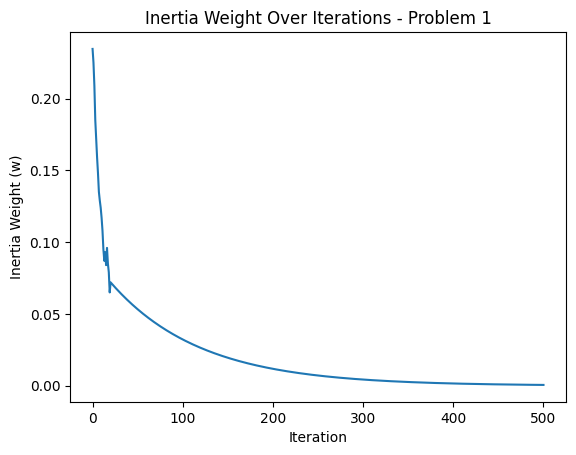

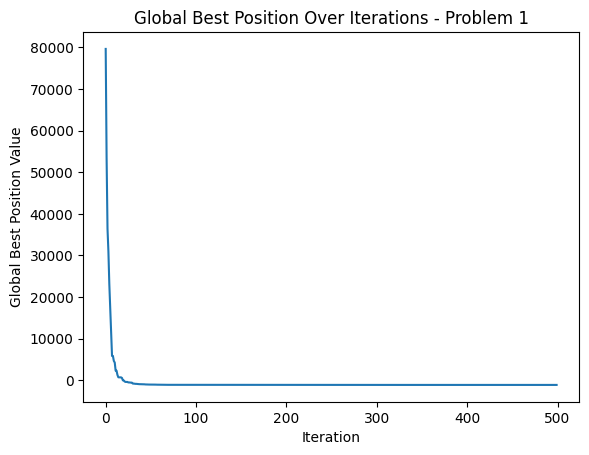




Problem 2 Best Cost: [-701.3980835  -701.43151461 -701.44781184 -701.47700916 -701.49496294
 -701.53577685 -701.53734281 -701.56216064 -701.58003597 -701.58409775
 -701.59335204 -701.6262534  -701.63408031 -701.64298385 -701.67064936
 -701.67535807 -701.67535807 -701.7094165  -701.71991595 -701.73457528
 -701.73979593 -701.75628589 -701.75628589 -701.75628589 -701.75628589
 -701.75690806 -701.75690806 -701.77240292 -701.77954268 -701.77954268
 -701.79644875 -701.79644875 -701.80457092 -701.80457092 -701.82330933
 -701.83137128 -701.83793772 -701.84218977 -701.84218977 -701.84218977
 -701.84218977 -701.84839007 -701.84905224 -701.85709209 -701.85709209
 -701.87980004 -701.87980004 -701.90125164 -701.90125164 -701.90125164
 -701.90125164 -701.91334161 -701.91334161 -701.91334161 -701.95275213
 -701.95275213 -701.95275213 -701.9575858  -701.9575858  -701.9575858
 -701.9575858  -701.95952022 -701.95971084 -701.96151077 -701.96305573
 -701.96305573 -701.96305573 -701.9660676  -701.972129

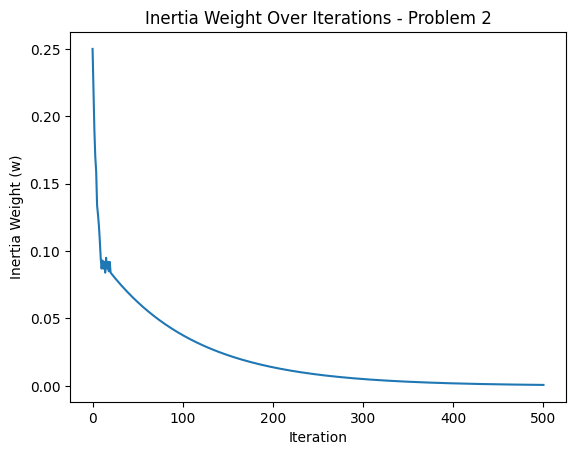

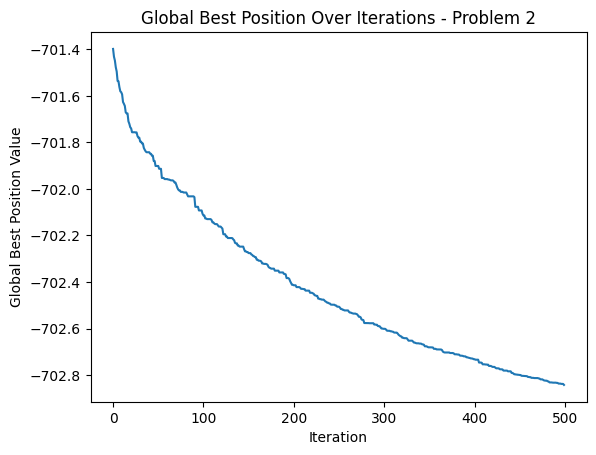




Problem 3 Best Cost: [ 4.45727148e+10  3.34610615e+10  2.37359389e+10  1.88643731e+10
  1.70552189e+10  1.19004001e+10  8.35500674e+09  6.53095857e+09
  6.24873730e+09  5.44095366e+09  4.23490019e+09  3.54001568e+09
  3.14282053e+09  3.10869783e+09  2.83313427e+09  2.46124994e+09
  2.26763681e+09  1.80863558e+09  1.65171294e+09  1.63476253e+09
  1.27185323e+09  1.27185323e+09  1.06632844e+09  8.22941351e+08
  8.22941351e+08  8.22941351e+08  7.83803437e+08  5.62767556e+08
  5.34404136e+08  4.99002091e+08  4.99002091e+08  4.61854638e+08
  4.20202648e+08  4.16144468e+08  3.18907556e+08  3.11115266e+08
  2.94254599e+08  2.94254599e+08  2.75871980e+08  2.64807331e+08
  2.24207330e+08  1.93173025e+08  1.93173025e+08  1.64980487e+08
  1.64980487e+08  1.64980487e+08  1.55417206e+08  1.18447399e+08
  1.14905117e+08  1.01310279e+08  4.81876874e+07  4.81876874e+07
  4.81876874e+07  4.81876874e+07  4.81876874e+07  4.11032807e+07
  4.11032807e+07  3.97782148e+07  3.97782148e+07  3.97782148e+07
 

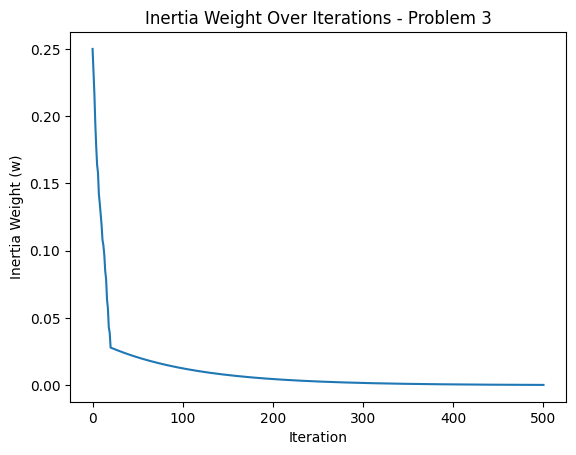

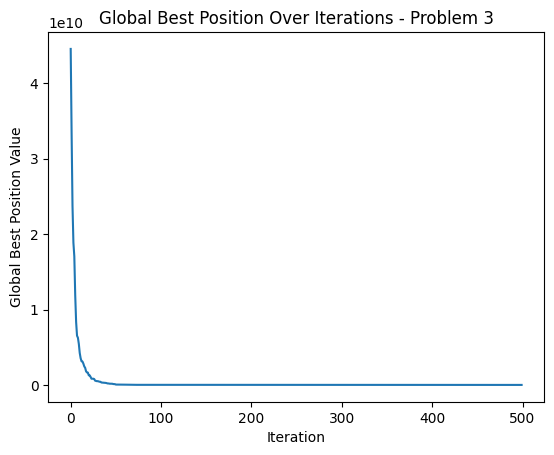




Problem 4 Best Cost: [ 4.11034940e+05  3.30187465e+05  2.47362637e+05  2.21621200e+05
  1.67611196e+05  1.02346069e+05  7.39398180e+04  6.08661704e+04
  5.40212418e+04  4.55588754e+04  3.44560002e+04  2.67870686e+04
  2.41313385e+04  2.09384988e+04  1.63894052e+04  1.39021928e+04
  1.13790786e+04  1.13790786e+04  1.12569089e+04  9.84380646e+03
  7.36951076e+03  7.36951076e+03  7.36951076e+03  6.02338856e+03
  4.99127336e+03  4.58416593e+03  3.72036911e+03  3.13488486e+03
  3.13488486e+03  3.13488486e+03  3.13488486e+03  2.54840806e+03
  2.54840806e+03  2.45092276e+03  2.05527226e+03  1.97903182e+03
  1.97903182e+03  1.97903182e+03  1.93137025e+03  1.93137025e+03
  1.90708338e+03  1.52711032e+03  1.52711032e+03  1.52711032e+03
  1.38357489e+03  1.32897980e+03  1.32897980e+03  1.32897980e+03
  1.32050864e+03  1.22140524e+03  1.07344283e+03  9.42726266e+02
  7.79499245e+02  7.79499245e+02  7.79499245e+02  7.79499245e+02
  7.68009303e+02  5.32892468e+02  5.32892468e+02  5.32892468e+02
 

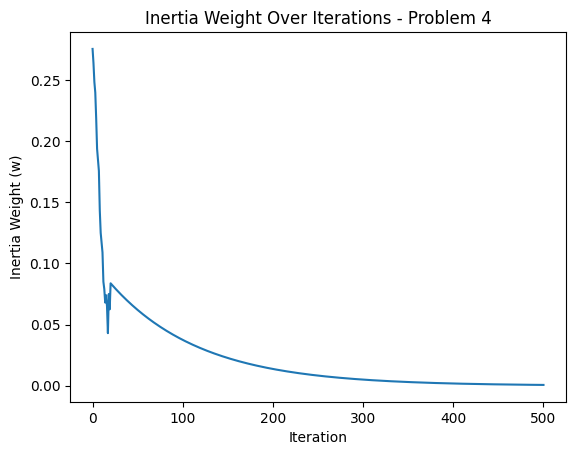

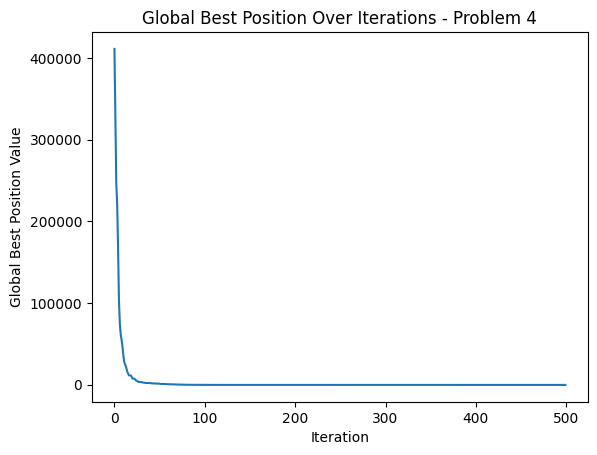




Problem 5 Best Cost: [-334.12241686 -334.18772342 -334.2283917  -334.28574377 -334.32067533
 -334.38020786 -334.46708005 -334.51591749 -334.56638764 -334.57278488
 -334.59368365 -334.60347985 -334.64317229 -334.64489069 -334.68373717
 -334.70423077 -334.70423077 -334.73264493 -334.73683133 -334.78163729
 -334.78655502 -334.80258538 -334.80889657 -334.8170973  -334.83705735
 -334.83705735 -334.83705735 -334.86113174 -334.86113174 -334.86113174
 -334.88764844 -334.89632184 -334.90323096 -334.90323096 -334.92760862
 -334.92760862 -334.92760862 -334.92760862 -334.9308511  -334.94965583
 -334.96812987 -334.96812987 -334.97435367 -334.97435367 -334.97435367
 -334.99128393 -335.01378899 -335.01378899 -335.01488507 -335.02976315
 -335.02976315 -335.06951114 -335.07174564 -335.07936141 -335.09846253
 -335.09846253 -335.09846253 -335.10447978 -335.10447978 -335.10967677
 -335.10967677 -335.11014878 -335.11029475 -335.15492942 -335.15492942
 -335.15492942 -335.16057251 -335.16057251 -335.16626

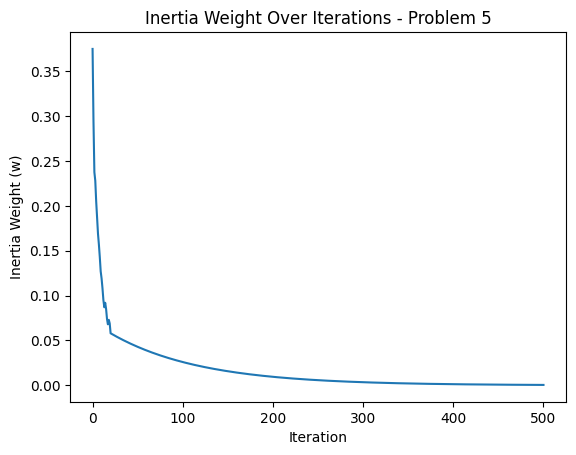

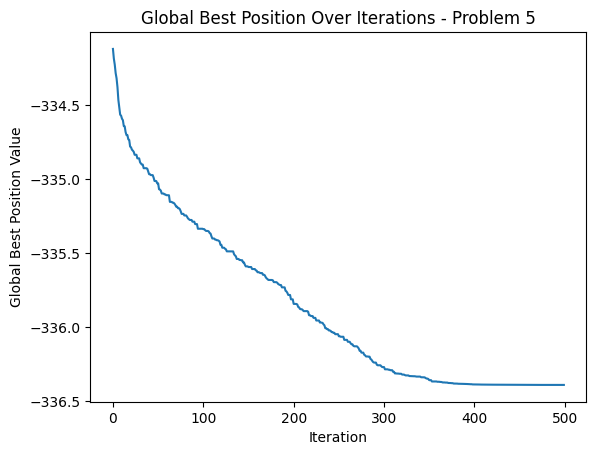




Problem 6 Best Cost: [-183.51322514 -183.56368516 -183.61902421 -183.64311105 -183.69219632
 -183.73844863 -183.77788552 -183.81077056 -183.82994081 -183.87809307
 -183.89899794 -183.92792511 -183.9411032  -183.95129863 -183.97206446
 -183.99294077 -184.03167406 -184.0728915  -184.0728915  -184.10519015
 -184.10519015 -184.12305333 -184.12631914 -184.15551791 -184.17725122
 -184.17725122 -184.17725122 -184.18910836 -184.18910836 -184.23454746
 -184.24349777 -184.24349777 -184.25145701 -184.25145701 -184.25145701
 -184.25745057 -184.28862518 -184.32506814 -184.32506814 -184.32506814
 -184.32506814 -184.33414226 -184.33414226 -184.35682513 -184.39787146
 -184.39787146 -184.39787146 -184.39787146 -184.39787146 -184.42497984
 -184.4272123  -184.4272123  -184.43459012 -184.46307387 -184.46307387
 -184.46970563 -184.48807583 -184.4982492  -184.4982492  -184.4982492
 -184.49897064 -184.49897064 -184.52013227 -184.52013227 -184.52013227
 -184.52013227 -184.52013227 -184.52013227 -184.536203

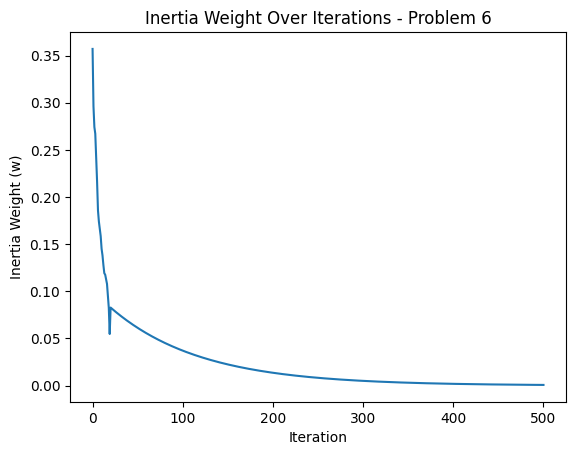

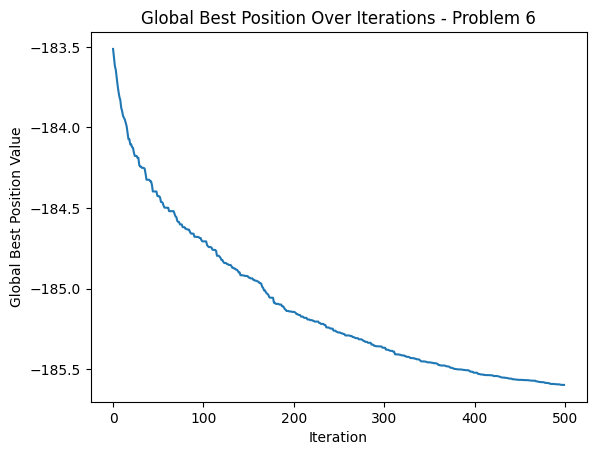




Problem 7 Best Cost: [53530.07180769 45084.61168226 32370.13853765 28888.05902788
 28888.05902788 28888.05902788 25166.7515788  21681.27058653
 16016.25389448 16016.25389448 12299.97702153 12299.97702153
 11725.17016306 11314.01894942 11170.46260889  8464.2284428
  8464.2284428   8464.2284428   8464.2284428   8464.2284428
  8464.2284428   8464.2284428   7184.13193022  7184.13193022
  7184.13193022  7184.13193022  7184.13193022  7184.13193022
  7184.13193022  6559.09090398  5710.88645697  5495.41419478
  4816.47287466  3148.00031611  3148.00031611  3131.97403823
  3131.97403823  3112.76079343  2951.07530646  1925.23481646
  1925.23481646  1717.68509731  1558.76421519  1558.76421519
  1229.22873319  1229.22873319  1119.53032754   859.00562445
   764.41390282   764.41390282   757.13355663   757.13355663
   757.13355663   757.13355663   582.93564916   582.93564916
   582.93564916   582.93564916   506.23490592   506.23490592
   506.23490592   374.69763182   374.69763182   374.69763182
  

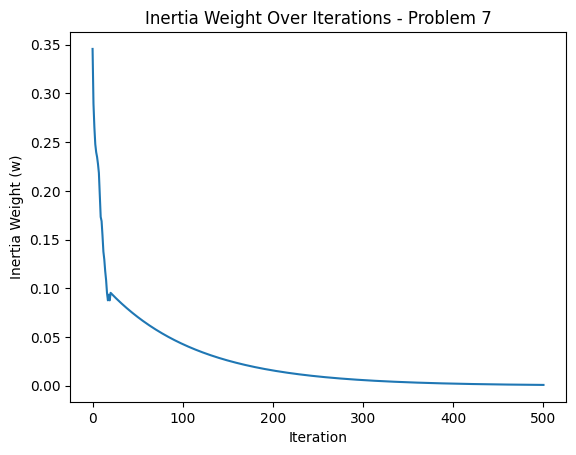

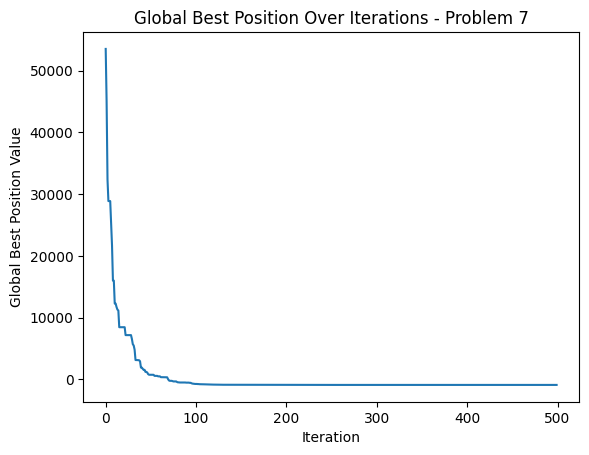




Problem 8 Best Cost: [ 5.76778322e+04  4.48647465e+04  3.89178430e+04  2.89792176e+04
  2.89792176e+04  2.17935870e+04  2.14789046e+04  1.77665007e+04
  1.77665007e+04  1.77665007e+04  1.54564476e+04  1.54564476e+04
  1.54564476e+04  1.54564476e+04  1.33488141e+04  1.29762580e+04
  1.20498760e+04  1.20498760e+04  1.12047980e+04  1.10668115e+04
  9.50241885e+03  9.03877916e+03  9.03877916e+03  7.81963404e+03
  7.81963404e+03  7.81963404e+03  7.81963404e+03  4.72086335e+03
  4.67891611e+03  3.95627698e+03  3.95627698e+03  3.95627698e+03
  3.95627698e+03  3.23193609e+03  3.21645202e+03  2.30473100e+03
  1.52339110e+03  1.10706823e+03  1.10706823e+03  1.10706823e+03
  7.99371818e+02  7.99371818e+02  3.61582629e+02  3.61582629e+02
  3.61582629e+02  3.61582629e+02  3.61582629e+02  3.61582629e+02
  3.61582629e+02  2.40191188e+02  2.24897153e+02  7.50733235e+01
 -3.97183626e+01 -3.97183626e+01 -3.97183626e+01 -3.97183626e+01
 -1.39377469e+02 -1.46328414e+02 -1.46328414e+02 -1.46328414e+02
 

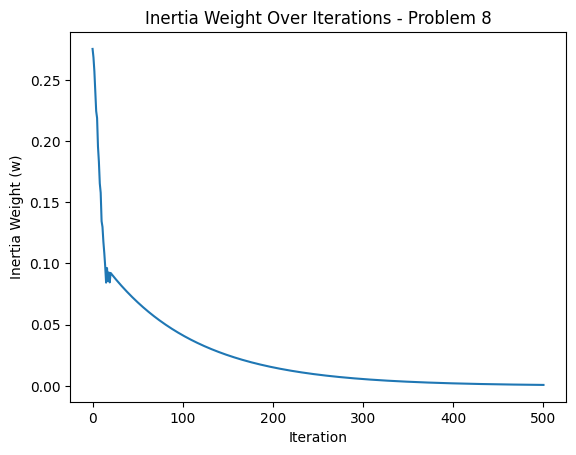

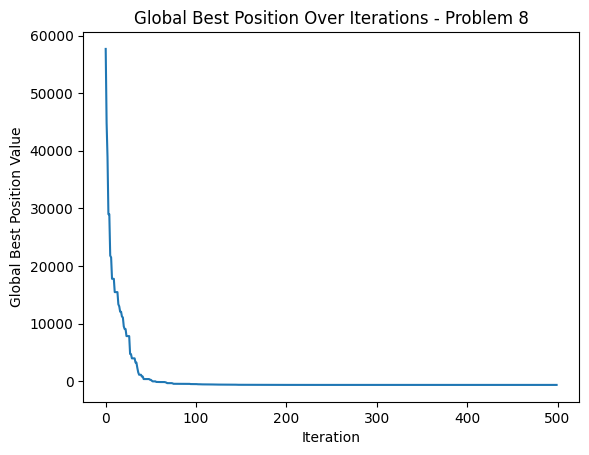




Problem 9 Best Cost: [291825.87311828 196200.75728632 137286.34561786 137286.34561786
 137286.34561786 137286.34561786  47712.26839592  47712.26839592
  47712.26839592  47712.26839592  47712.26839592  47712.26839592
  47712.26839592  47712.26839592  47712.26839592  47712.26839592
  47712.26839592  23424.85028066  23424.85028066  23424.85028066
  23424.85028066  23424.85028066  23424.85028066  23424.85028066
  23424.85028066  23424.85028066  23424.85028066  23424.85028066
  23424.85028066  23424.85028066  23424.85028066  23424.85028066
  23424.85028066  23424.85028066  17225.33246758  17225.33246758
  17225.33246758  17225.33246758  17225.33246758  17225.33246758
  17225.33246758  12090.21240115  12090.21240115  12090.21240115
  12090.21240115  12090.21240115  12090.21240115   5687.78300787
   5687.78300787   5687.78300787   4439.12331664   4439.12331664
   4439.12331664   4439.12331664   4439.12331664   4439.12331664
   4439.12331664   4439.12331664   4439.12331664   4439.12331664
 

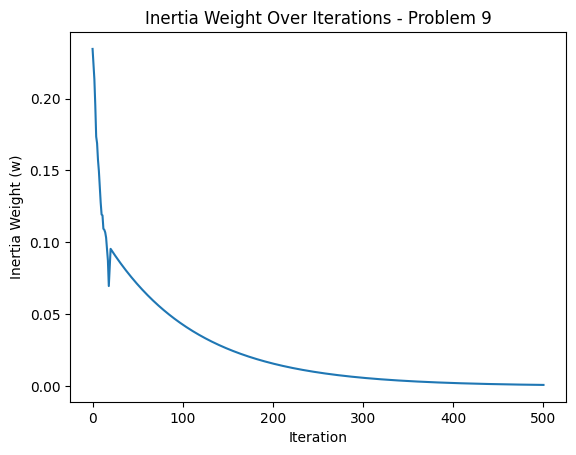

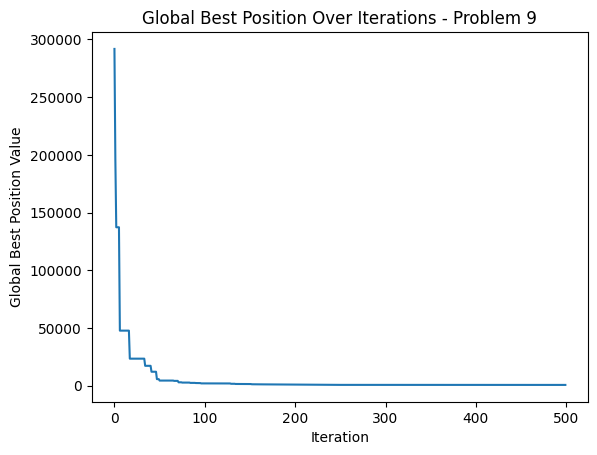




Problem 10 Best Cost: [57812.34735171 42449.61966827 33498.14783747 18012.21654875
 18012.21654875 18012.21654875 18012.21654875 15578.64813333
 14332.93630379 14332.93630379 14332.93630379 13975.64064457
 13975.64064457 13700.90459705 10811.92948003 10811.92948003
  9661.41604264  9661.41604264  9661.41604264  9661.41604264
  9661.41604264  9384.34071602  8523.79077576  7884.93325203
  7884.93325203  7884.93325203  7884.93325203  7529.50628189
  7370.2146363   7370.2146363   7370.2146363   7370.2146363
  6840.34813369  6840.34813369  6840.34813369  6840.34813369
  6840.34813369  6726.10845602  6726.10845602  6591.04888294
  6591.04888294  6591.04888294  6591.04888294  6591.04888294
  6591.04888294  6591.04888294  6582.23448652  6566.39420783
  6451.46377463  6024.02201285  6024.02201285  6021.37703351
  5973.51536458  5435.75395428  5435.75395428  5435.75395428
  5435.75395428  5435.75395428  5433.841824    5342.06481307
  5342.06481307  5342.06481307  5254.53813081  5234.83033318


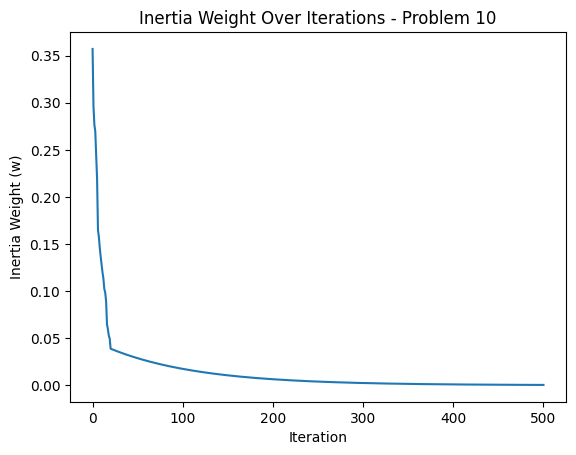

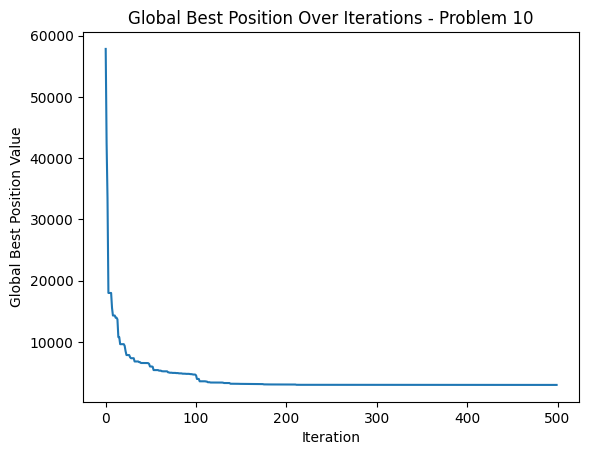




Problem 11 Best Cost: [74266.78170518 41032.93928575 37138.34497673 29783.87220773
 28141.45813534 28141.45813534 28141.45813534 21344.34786977
 21344.34786977 20549.21824726 15495.46688296 14790.39199402
 12685.3024866  12581.72013367 10740.15642368  8736.09127112
  6963.91517834  6422.57227626  5611.87152331  5611.87152331
  5611.87152331  4244.30894609  4244.30894609  4244.30894609
  4244.30894609  4244.30894609  4237.55158701  3770.73034565
  3770.73034565  3770.73034565  3770.73034565  3770.73034565
  3508.46509605  3508.46509605  3508.46509605  3508.46509605
  3508.46509605  2855.79714681  2855.79714681  2306.57541026
  2306.57541026  1922.68944266  1922.68944266  1915.28062421
  1915.28062421  1915.28062421  1699.5666551   1699.5666551
  1699.5666551   1699.5666551   1699.5666551   1699.5666551
  1603.64131533  1603.64131533  1603.64131533  1603.64131533
  1603.64131533  1603.64131533  1603.64131533  1603.64131533
  1552.29175191  1552.29175191  1528.49224691  1528.49224691
 

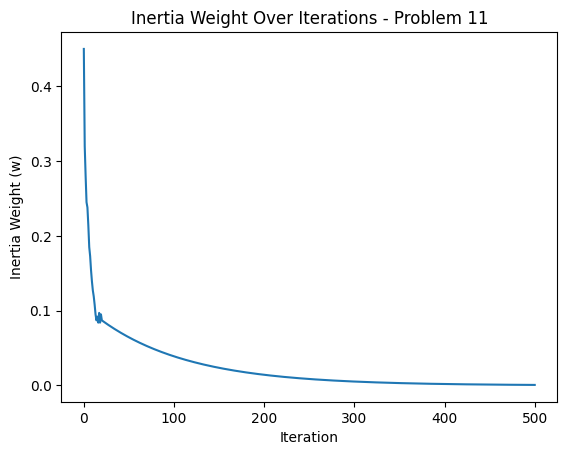

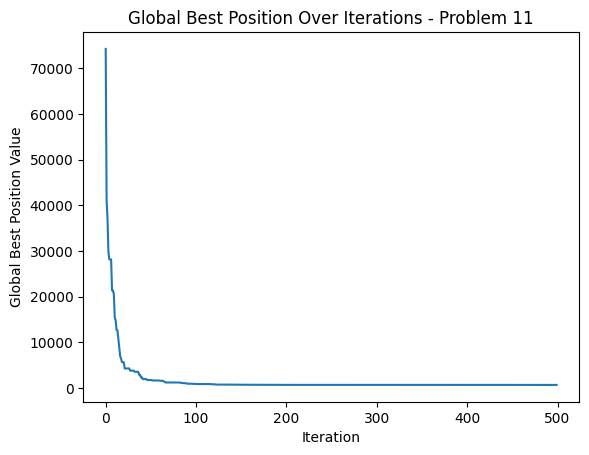




Problem 12 Best Cost: [56496.18158276 54071.85936884 38568.19737898 32959.00594594
 21320.26753264 20431.8496315  20431.8496315  20431.8496315
 20431.8496315  20431.8496315  20431.8496315  19959.86386087
 19959.86386087 17371.95704824 17371.95704824 17371.95704824
 17371.95704824 17371.95704824 17371.95704824 17371.95704824
 17371.95704824 17371.95704824 17371.95704824 16997.15867374
 16997.15867374 16997.15867374 16997.15867374 16077.76908747
 16077.76908747 16077.76908747 16077.76908747 16077.76908747
 15353.42411892 15353.42411892 15353.42411892 15353.42411892
 15353.42411892 14904.47649194 14904.47649194 14400.37202277
 14400.37202277 14400.37202277 14400.37202277 13808.42210026
 13808.42210026 13808.42210026 13808.42210026 13808.42210026
 13808.42210026 13423.0728908  13423.0728908  13423.0728908
 12828.58043395 12828.58043395 12828.58043395 12828.58043395
 12828.58043395 12828.58043395 12828.58043395 12828.58043395
 11593.48256713 11593.48256713 11593.48256713 11593.48256713
 

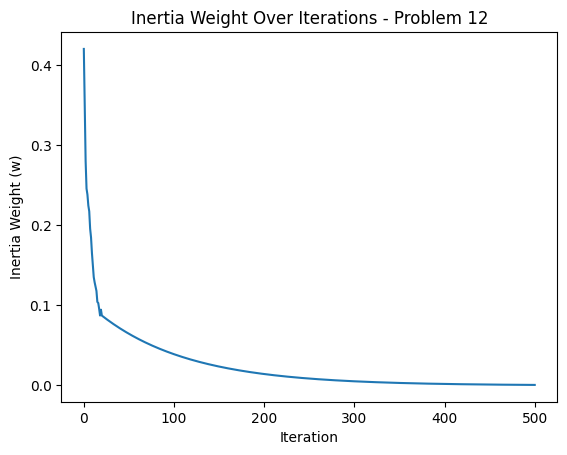

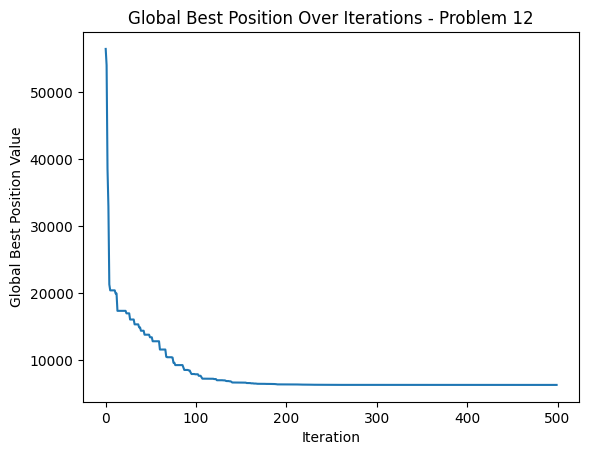




Problem 13 Best Cost: [161888.18595495 161888.18595495  95517.02867775  95517.02867775
  95517.02867775  95517.02867775  95517.02867775  95517.02867775
  95517.02867775  95517.02867775  95517.02867775  95517.02867775
  72781.37532773  72781.37532773  72781.37532773  72781.37532773
  72781.37532773  72781.37532773  72781.37532773  72781.37532773
  72781.37532773  72781.37532773  72781.37532773  72781.37532773
  72529.08563447  72529.08563447  72529.08563447  72529.08563447
  72529.08563447  72529.08563447  27657.25068579  27657.25068579
  27657.25068579  27657.25068579  27657.25068579  27657.25068579
  27657.25068579  27657.25068579  27657.25068579  26637.21633009
  26637.21633009  26637.21633009  26637.21633009  26637.21633009
  26637.21633009  26637.21633009  26637.21633009  26637.21633009
  26637.21633009  26637.21633009  26637.21633009  26637.21633009
  26637.21633009  26637.21633009  26637.21633009  26637.21633009
  26637.21633009  26637.21633009  26637.21633009  26637.21633009


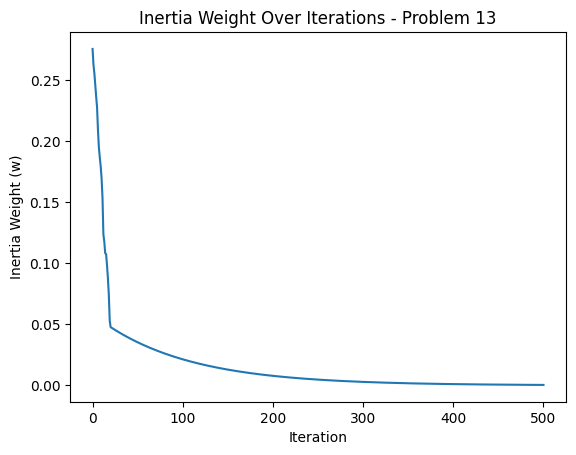

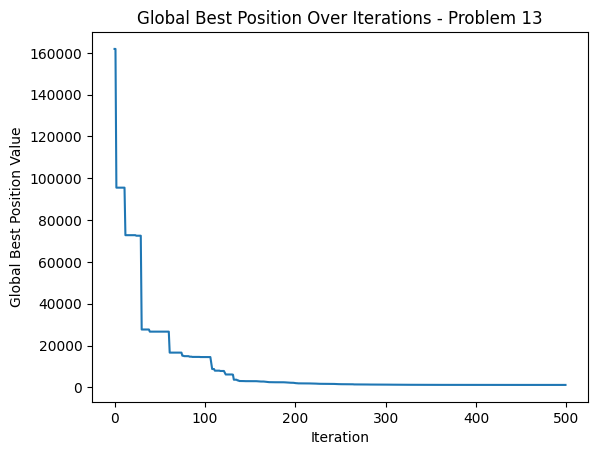




Problem 14 Best Cost: [31858.34241409 31858.34241409 17735.65000098 17003.43008548
 16809.60572482 11134.39528105 11134.39528105 10238.5478064
 10238.5478064  10238.5478064  10238.5478064  10238.5478064
 10238.5478064  10238.5478064  10238.5478064  10238.5478064
 10238.5478064  10238.5478064  10238.5478064  10238.5478064
 10238.5478064   9528.62820455  9528.62820455  9528.62820455
  9528.62820455  9528.62820455  8413.81383606  8413.81383606
  8413.81383606  8413.81383606  8413.81383606  8413.81383606
  8413.81383606  8413.81383606  8413.81383606  8413.81383606
  8413.81383606  8413.81383606  8413.81383606  8413.81383606
  8413.81383606  8413.81383606  8413.81383606  8413.81383606
  8413.81383606  8413.81383606  8413.81383606  8399.67015088
  8399.67015088  8399.67015088  8399.67015088  8399.67015088
  8399.67015088  8041.46545867  8041.46545867  8041.46545867
  8041.46545867  8041.46545867  7775.72525926  7473.33431982
  7473.33431982  7473.33431982  7473.33431982  7473.33431982
  7

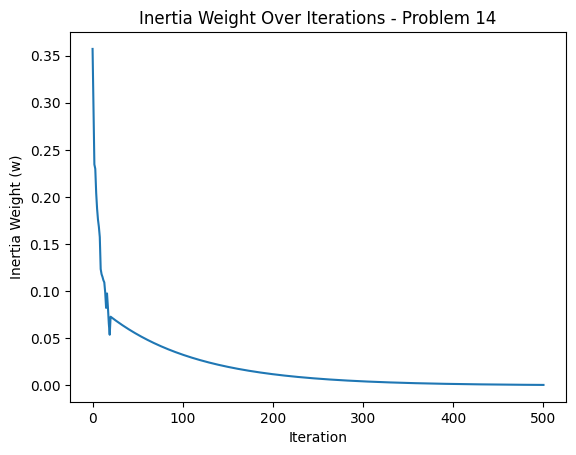

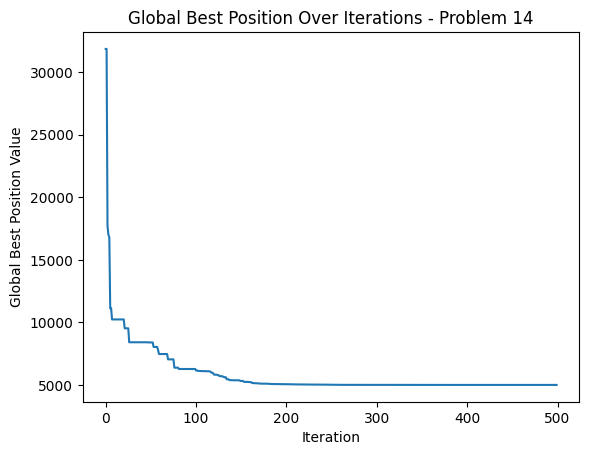




Problem 15 Best Cost: [-224.59373134 -225.22763903 -226.02222934 -226.02222934 -226.02222934
 -226.02222934 -226.02222934 -226.02222934 -226.11999601 -226.11999601
 -226.11999601 -227.03887017 -227.03887017 -227.03887017 -227.03887017
 -227.03887017 -227.03887017 -227.17706391 -227.17706391 -227.17706391
 -227.17706391 -227.17706391 -227.17706391 -227.17706391 -227.17706391
 -227.17706391 -227.3502915  -227.3502915  -227.35373567 -227.47000308
 -227.47000308 -227.47000308 -227.47000308 -227.5852824  -227.5852824
 -227.5852824  -227.88473449 -227.88473449 -227.88473449 -227.88473449
 -227.93106218 -227.93106218 -227.93106218 -227.93106218 -227.93106218
 -227.93106218 -227.93106218 -227.93106218 -227.93106218 -227.94769728
 -227.94769728 -227.99788797 -228.06426488 -228.07946768 -228.07946768
 -228.07946768 -228.07946768 -228.2610855  -228.2610855  -228.33101638
 -228.33101638 -228.33101638 -228.33101638 -228.33101638 -228.33101638
 -228.34752993 -228.34752993 -228.40390653 -228.40390

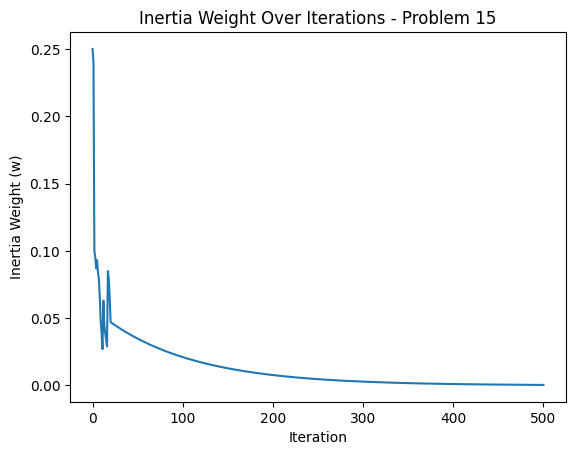

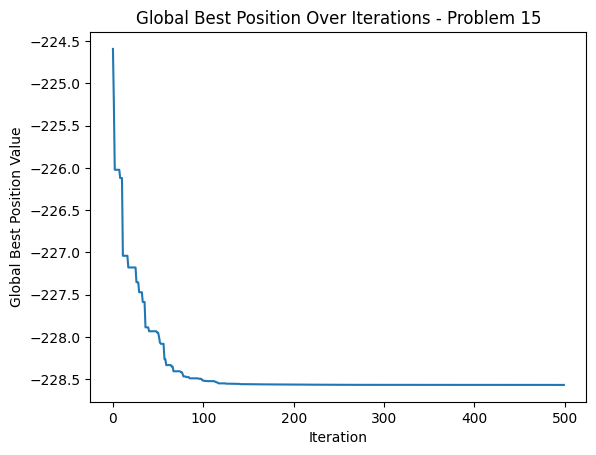




Problem 16 Best Cost: [61975.02108302 49665.97174077 37632.62090485 36310.71141645
 26831.50671578 14936.31816344  7320.44707324  3693.91107572
  3592.09556112  3008.00453257  -177.47844105 -1756.23634087
 -1759.85651261 -2408.35435663 -2567.46911308 -2829.15890135
 -2834.19183522 -2834.19183522 -2834.19183522 -3025.49680856
 -3025.49680856 -3232.85159535 -3299.40261908 -3340.5380093
 -3736.81760393 -3749.68246791 -3749.68246791 -3780.9334151
 -3780.9334151  -3890.42625489 -3890.42625489 -3890.42625489
 -3890.42625489 -3988.58753039 -4060.55174863 -4072.93124878
 -4072.93124878 -4097.32316987 -4097.32316987 -4112.64866209
 -4112.64866209 -4112.64866209 -4120.65315794 -4120.65315794
 -4124.2190663  -4183.29118101 -4191.86110296 -4191.86110296
 -4221.54769667 -4221.54769667 -4221.54769667 -4221.54769667
 -4231.0465489  -4231.0465489  -4255.97439582 -4268.68277399
 -4268.68277399 -4268.68277399 -4273.73968459 -4273.73968459
 -4273.73968459 -4273.73968459 -4273.73968459 -4281.27244389
 

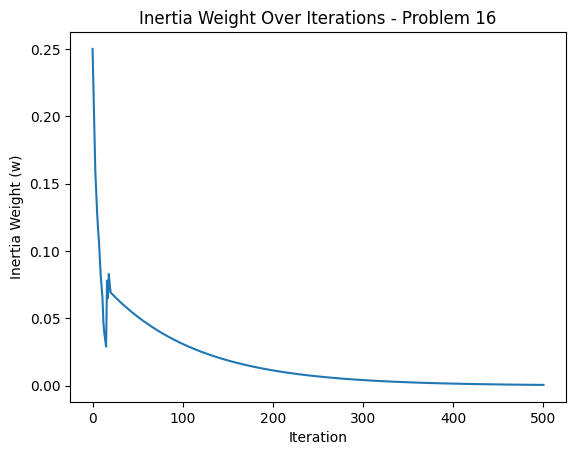

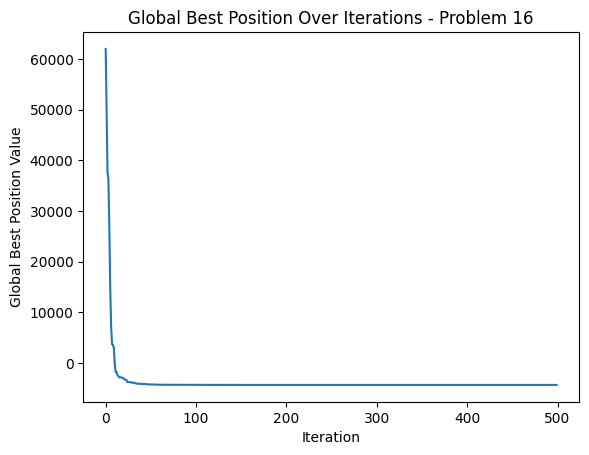




Problem 17 Best Cost: [ 2.79119172e+06  2.37782572e+06  1.90474501e+06  1.60645559e+06
  1.37071904e+06  1.17419926e+06  9.01482939e+05  8.76041733e+05
  7.85104136e+05  5.88935858e+05  4.45816522e+05  3.85217424e+05
  2.54093412e+05  1.43722404e+05  1.30460349e+05  1.15835252e+05
  1.15835252e+05  9.33402841e+04  8.16735293e+04  7.60322759e+04
  7.60322759e+04  6.04181734e+04  5.42157670e+04  5.23364224e+04
  4.55946794e+04  4.55946794e+04  4.34138196e+04  3.15765020e+04
  2.88635105e+04  2.88635105e+04  2.55173131e+04  2.45098983e+04
  2.38631493e+04  2.38631493e+04  2.38631493e+04  2.15800582e+04
  1.95409144e+04  1.88652707e+04  1.42034758e+04  1.42034758e+04
  1.42034758e+04  1.42034758e+04  1.16238427e+04  9.67392249e+03
  9.67392249e+03  9.44219126e+03  9.44219126e+03  6.88828454e+03
  6.88828454e+03  6.59190942e+03  6.59190942e+03  4.94414853e+03
  4.05392668e+03  1.97052852e+03  1.97052852e+03  1.97052852e+03
  1.69562476e+03  8.12744900e+02  8.12744900e+02  8.12744900e+02


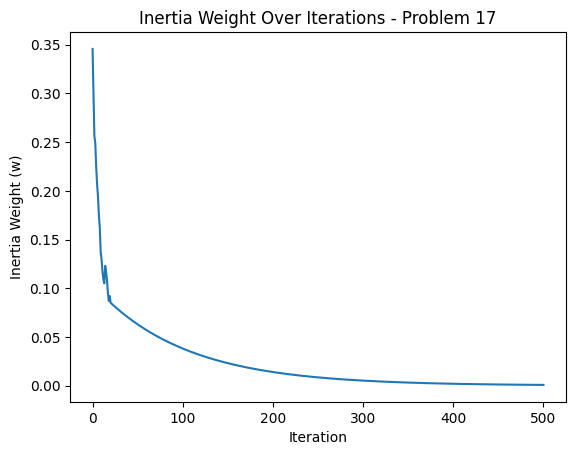

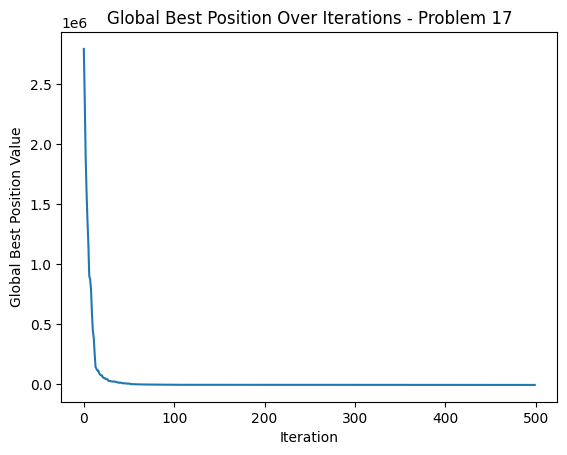




Problem 18 Best Cost: [55610.32603578 52450.87247344 43044.69087693 39843.40404278
 39843.40404278 38931.03938531 35277.05420804 29874.82863874
 29874.82863874 28848.12653221 28848.12653221 28469.60920272
 25920.74853668 25920.74853668 25007.96901997 25007.96901997
 25007.96901997 24001.01726107 21461.87429288 21461.87429288
 21461.87429288 21461.87429288 21461.87429288 21461.87429288
 21461.87429288 21461.87429288 20058.98275199 20058.98275199
 20058.98275199 20058.98275199 20058.98275199 20058.98275199
 20058.98275199 20058.98275199 20058.98275199 20058.98275199
 20058.98275199 20058.98275199 20058.98275199 20058.98275199
 20058.98275199 20058.98275199 20058.98275199 20058.98275199
 20058.98275199 17893.49651065 17893.49651065 17893.49651065
 17893.49651065 17893.49651065 17893.49651065 17255.04307992
 17010.76147046 17010.76147046 17010.76147046 17010.76147046
 15840.59109593 15840.59109593 15840.59109593 15840.59109593
 15840.59109593 15840.59109593 15543.97267303 15376.36283064

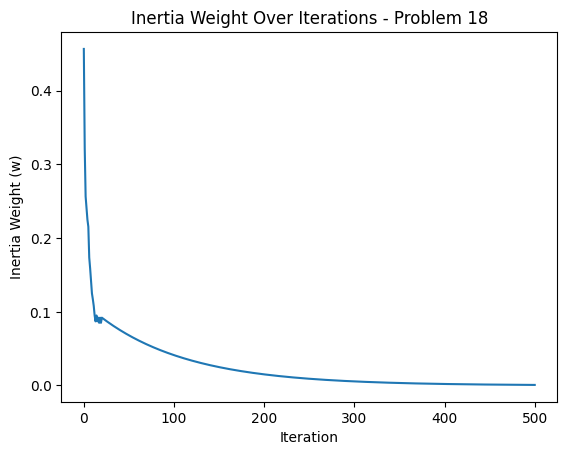

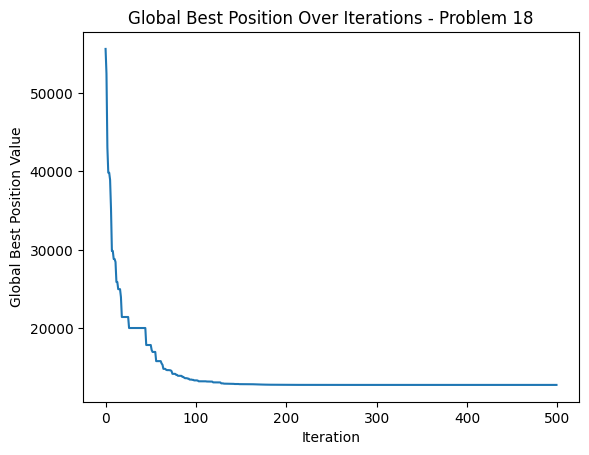




Problem 19 Best Cost: [52869.45605305 34684.68497285 28998.76723622 27744.10944649
 27744.10944649 27744.10944649 27744.10944649 27744.10944649
 27744.10944649 26684.08312686 19574.07584853 19574.07584853
 19574.07584853 17803.20646057 16902.7263634  16902.7263634
 16902.7263634  16902.7263634  16902.7263634  16902.7263634
 16902.7263634  16902.7263634  16902.7263634  16902.7263634
 16902.7263634  15888.18728746 15642.54324745 15642.54324745
 12646.69625046 12646.69625046 12646.69625046 12646.69625046
 12646.69625046 12646.69625046  9964.59937047  9964.59937047
  9964.59937047  9964.59937047  9964.59937047  9964.59937047
  9964.59937047  9964.59937047  9964.59937047  9964.59937047
  9964.59937047  9964.59937047  9964.59937047  9964.59937047
  9964.59937047  9964.59937047  9964.59937047  9964.59937047
  9964.59937047  9964.59937047  9964.59937047  9964.59937047
  9964.59937047  9964.59937047  9964.59937047  9964.59937047
  9964.59937047  9964.59937047  9964.59937047  9964.59937047
  

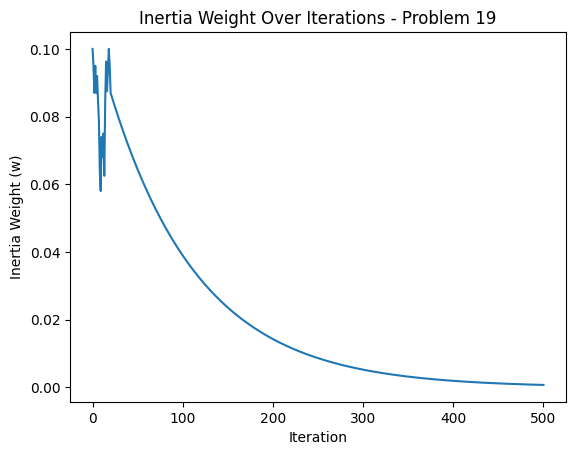

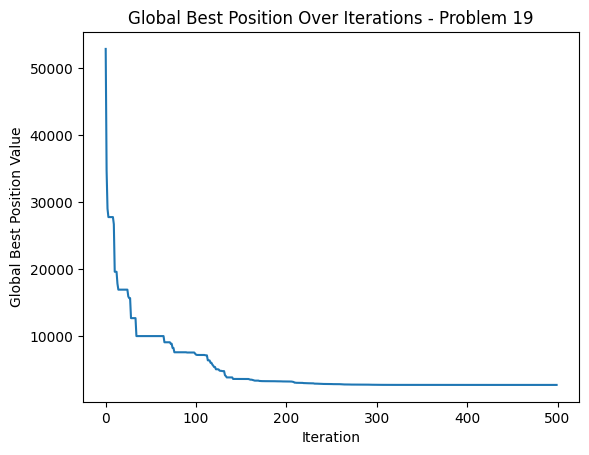




Problem 20 Best Cost: [-83.97023393 -83.97023393 -83.97023393 -84.39808106 -85.19185526
 -86.60511621 -86.60511621 -86.79902884 -86.79902884 -86.79902884
 -86.9533268  -87.51515269 -87.82386013 -87.82386013 -88.00656446
 -88.00656446 -88.00656446 -88.32261735 -88.32261735 -88.32261735
 -88.32261735 -88.32261735 -88.32261735 -88.32261735 -88.32261735
 -88.32261735 -88.32261735 -88.32261735 -88.66491347 -88.66491347
 -88.66491347 -88.66491347 -88.66491347 -88.66491347 -88.66491347
 -88.66491347 -88.66491347 -88.66491347 -88.70922839 -88.70922839
 -88.70922839 -88.740355   -88.740355   -88.82490356 -88.85133646
 -89.26114481 -89.27899483 -89.27899483 -89.27899483 -89.4156385
 -89.4156385  -89.42780594 -89.42780594 -89.42780594 -89.42780594
 -89.42780594 -89.42780594 -89.42780594 -89.43417016 -89.43417016
 -89.4988861  -89.59935029 -89.59935029 -89.59935029 -89.70140749
 -89.70140749 -89.70140749 -89.70140749 -89.70140749 -89.70140749
 -89.70140749 -89.70140749 -89.70140749 -89.78257675

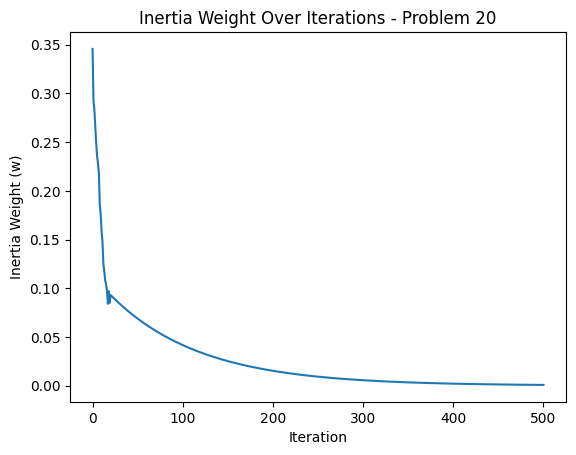

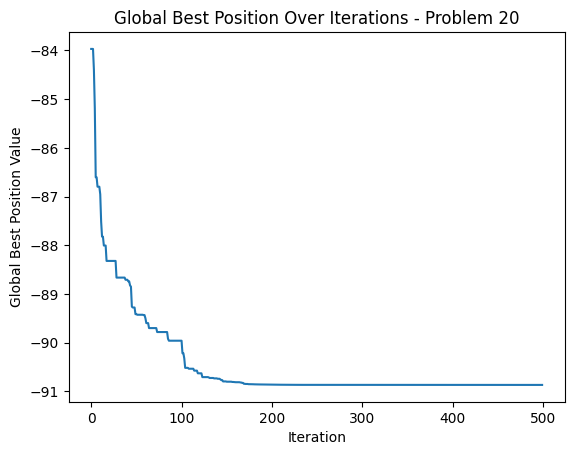




Problem 21 Best Cost: [165.03780503  99.92354026  54.49614129  22.40305715  21.94001327
  14.06819771   3.8152169   -2.58290181  -4.17663474  -4.17663474
  -4.17663474 -20.19185328 -20.19185328 -20.19185328 -20.19185328
 -20.19185328 -21.13777443 -21.71935297 -21.71935297 -24.87179806
 -24.87179806 -24.87179806 -24.87179806 -29.45567206 -29.74266144
 -29.74266144 -29.74266144 -29.74266144 -29.74266144 -31.30957893
 -31.30957893 -31.30957893 -31.34667504 -31.61306596 -31.97859661
 -31.97859661 -33.83288306 -33.88055298 -34.13265636 -34.13265636
 -34.13265636 -34.13265636 -34.13265636 -34.13265636 -34.3878542
 -34.3878542  -34.3878542  -34.3878542  -34.3878542  -34.3878542
 -34.3878542  -34.3878542  -34.3878542  -35.46796846 -35.46796846
 -35.85687574 -35.85687574 -35.85687574 -36.21988782 -37.64977299
 -37.64977299 -37.64977299 -38.02760121 -38.02760121 -38.02760121
 -38.02760121 -39.47093386 -39.54493888 -39.54493888 -39.54493888
 -39.54493888 -39.83376991 -39.83376991 -39.83376991 

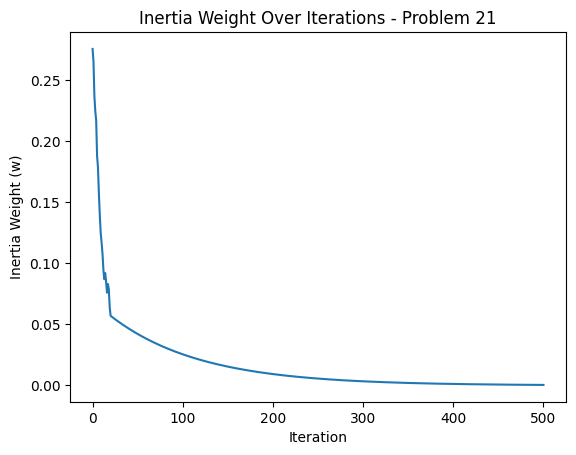

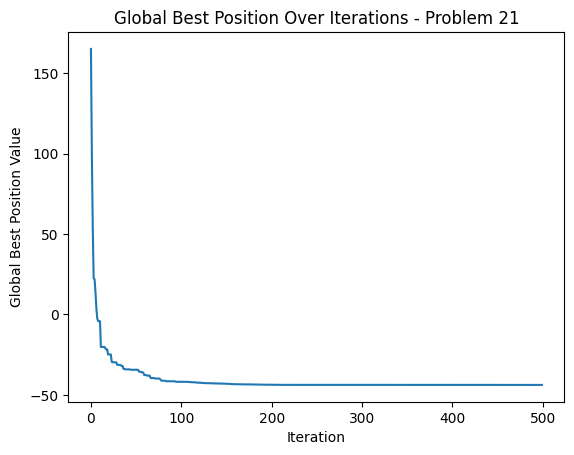




Problem 22 Best Cost: [258435.86942588 225657.30072529 223776.39098348 132791.66433145
 132791.66433145 132791.66433145 132477.51725462 132477.51725462
 132477.51725462 132477.51725462 132477.51725462 132477.51725462
 132477.51725462 132477.51725462 127925.82428931 127925.82428931
 127925.82428931 127925.82428931 127925.82428931 127925.82428931
 127925.82428931 127925.82428931 127925.82428931 127925.82428931
 127925.82428931 127925.82428931 120279.96923738 120279.96923738
 120279.96923738 120279.96923738 120279.96923738 104778.4455962
 104778.4455962  104778.4455962  104778.4455962  104778.4455962
 104778.4455962  104778.4455962  104778.4455962  104778.4455962
 104778.4455962  104778.4455962  104778.4455962  104778.4455962
 104778.4455962  102515.41031671 102515.41031671 102515.41031671
 100833.35633876 100833.35633876 100833.35633876  94337.12082441
  94337.12082441  89506.65362322  89506.65362322  89506.65362322
  89506.65362322  89506.65362322  89506.65362322  87389.73464217
  87

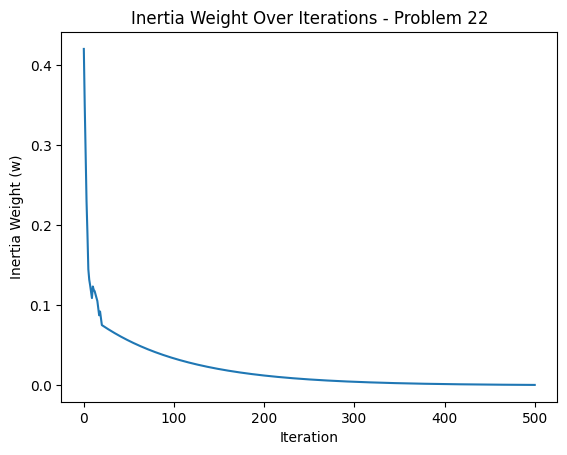

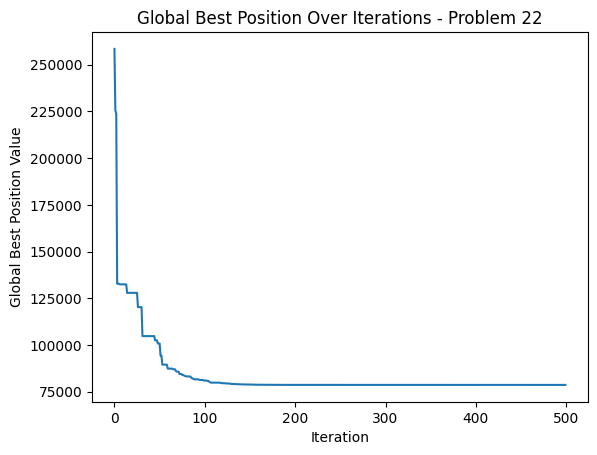




Problem 23 Best Cost: [-16.79084713 -21.87723441 -27.25746219 -28.83281087 -31.76029082
 -31.76029082 -31.76029082 -31.76029082 -31.76029082 -31.76029082
 -31.76029082 -31.76029082 -32.7675813  -32.7675813  -32.7675813
 -32.7675813  -32.7675813  -32.7675813  -33.07860228 -40.16966644
 -40.16966644 -40.16966644 -40.16966644 -40.16966644 -41.81746687
 -41.81746687 -41.81746687 -41.81746687 -41.81746687 -41.81746687
 -41.81746687 -41.81746687 -46.55055818 -46.55055818 -46.77614488
 -46.77614488 -46.77614488 -47.71613978 -47.71613978 -47.71613978
 -49.11009862 -49.11009862 -49.11009862 -49.11009862 -49.11009862
 -50.51783719 -50.51783719 -50.51783719 -50.51783719 -50.51783719
 -50.51783719 -50.51783719 -50.51783719 -52.12012575 -53.47691213
 -53.47691213 -53.47691213 -53.47691213 -53.47691213 -53.47691213
 -53.47691213 -53.47691213 -53.47691213 -53.58522142 -53.58522142
 -55.06332187 -55.06332187 -55.73109059 -56.30336756 -56.30336756
 -56.83957179 -56.83957179 -56.98794943 -56.98794943

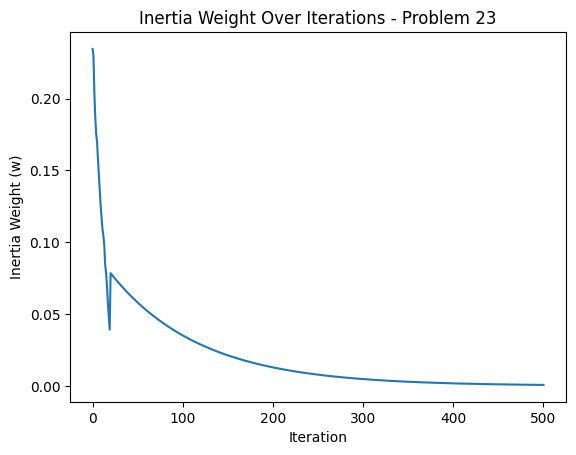

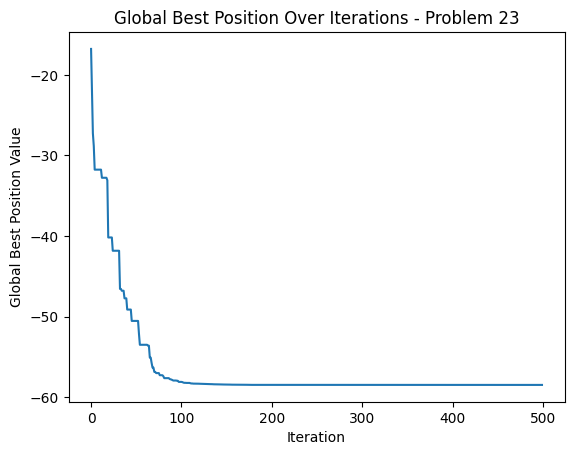




Problem 24 Best Cost: [122.36245301 109.20412243  96.62814788  85.32543058  85.32543058
  76.07470305  76.07470305  75.23528768  75.23528768  66.40786659
  66.40786659  64.93395022  64.93395022  64.93395022  64.72812874
  64.1435449   64.1435449   64.1435449   64.1435449   60.32694816
  58.93647641  56.41624646  54.39862625  54.39862625  54.39862625
  45.67486227  45.67486227  45.67486227  45.67486227  45.67486227
  45.3459528   45.3459528   45.3459528   45.3459528   45.3459528
  45.3459528   45.3459528   45.3459528   45.3459528   45.3459528
  45.3459528   45.3459528   45.3459528   45.3459528   45.3459528
  45.3459528   43.2207273   43.2207273   40.87224316  39.23273502
  36.44943505  36.44943505  36.44943505  36.44943505  36.44943505
  36.44943505  36.44943505  34.89395054  34.89395054  34.89395054
  34.89395054  34.89395054  34.89395054  34.89395054  34.89395054
  34.89395054  34.89395054  34.89395054  34.89395054  34.05947867
  34.05947867  34.05947867  34.05947867  34.05947867  

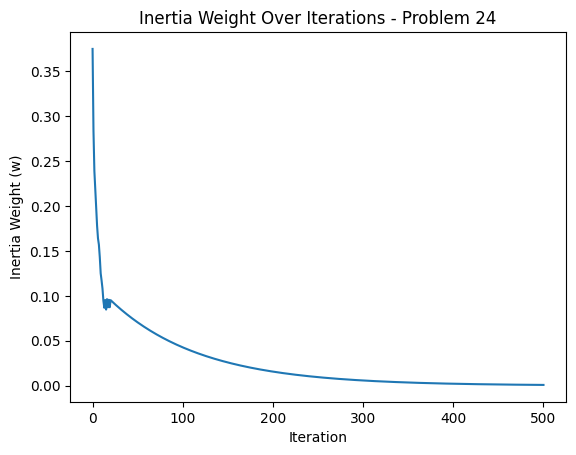

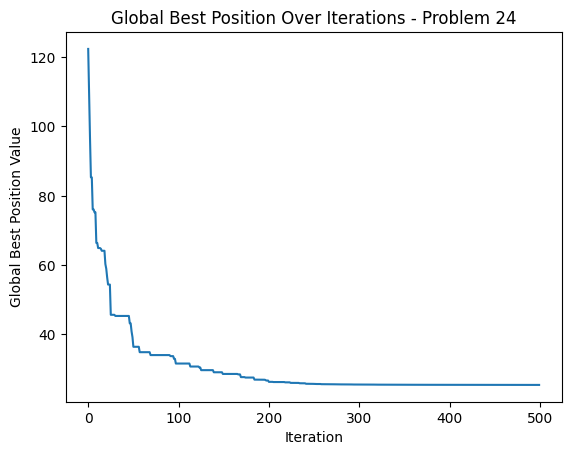

In [25]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [ ]:
print('nice')

In [ ]:
print('almost complete')

In [ ]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [ ]:
print('ok')

ok
